In [1]:
from pytictoc import TicToc
t = TicToc() #create instance of class

from src.Prep import *
from src.Model import *
import warnings
warnings.filterwarnings('ignore')

%load_ext autoreload
%reload_ext autoreload

/Users/jenniferpaige/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.regression module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [277]:
%autoreload

------------------------------------PREP------------------------------------
 1 of 11 |    Reading in data 
         |    Filtering to 4 features:
         |       Date, System Size, Total Cost, Customer Segment 
         |    Changing -9999 values to null
 2 of 11 |    Cleaning up column names
 3 of 11 |    Refining to only RES Customer Segment
 4 of 11 |    Sorting values by installation_date
         |    Assigning installation_date as index
 5 of 11 |    Replacing all null values with median values from same year
 6 of 11 |    Adusting prices for inflation
 7 of 11 |    Creating target variable: cost_per_watt
 8 of 11 |    Resampling data into weekly medians
         |    Cropping dataframe to keep only continuous non-null data
 9 of 11 |    Testing for stationarity
         |       ADF P-value: 0.9588 
         |       Time Series is not stationary.   
         |       Fail to reject ADF H0
10 of 11 |    Creating differenced data to achieve stationarity
11 of 11 |    Testing for s

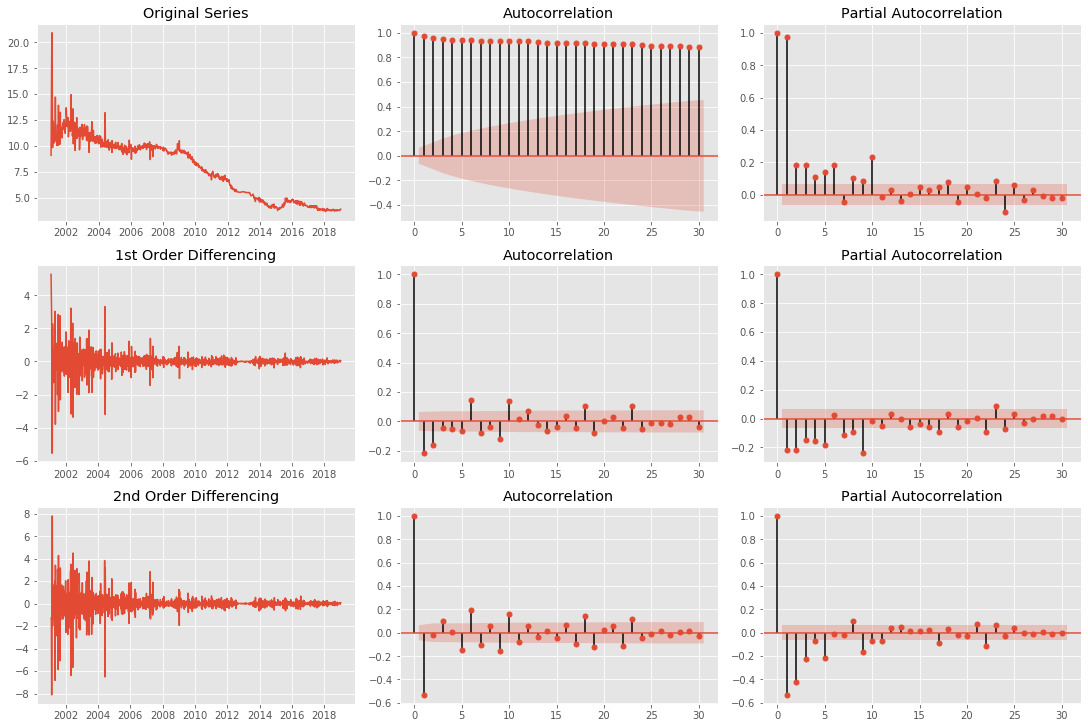

In [2]:
df = Prep().compile()

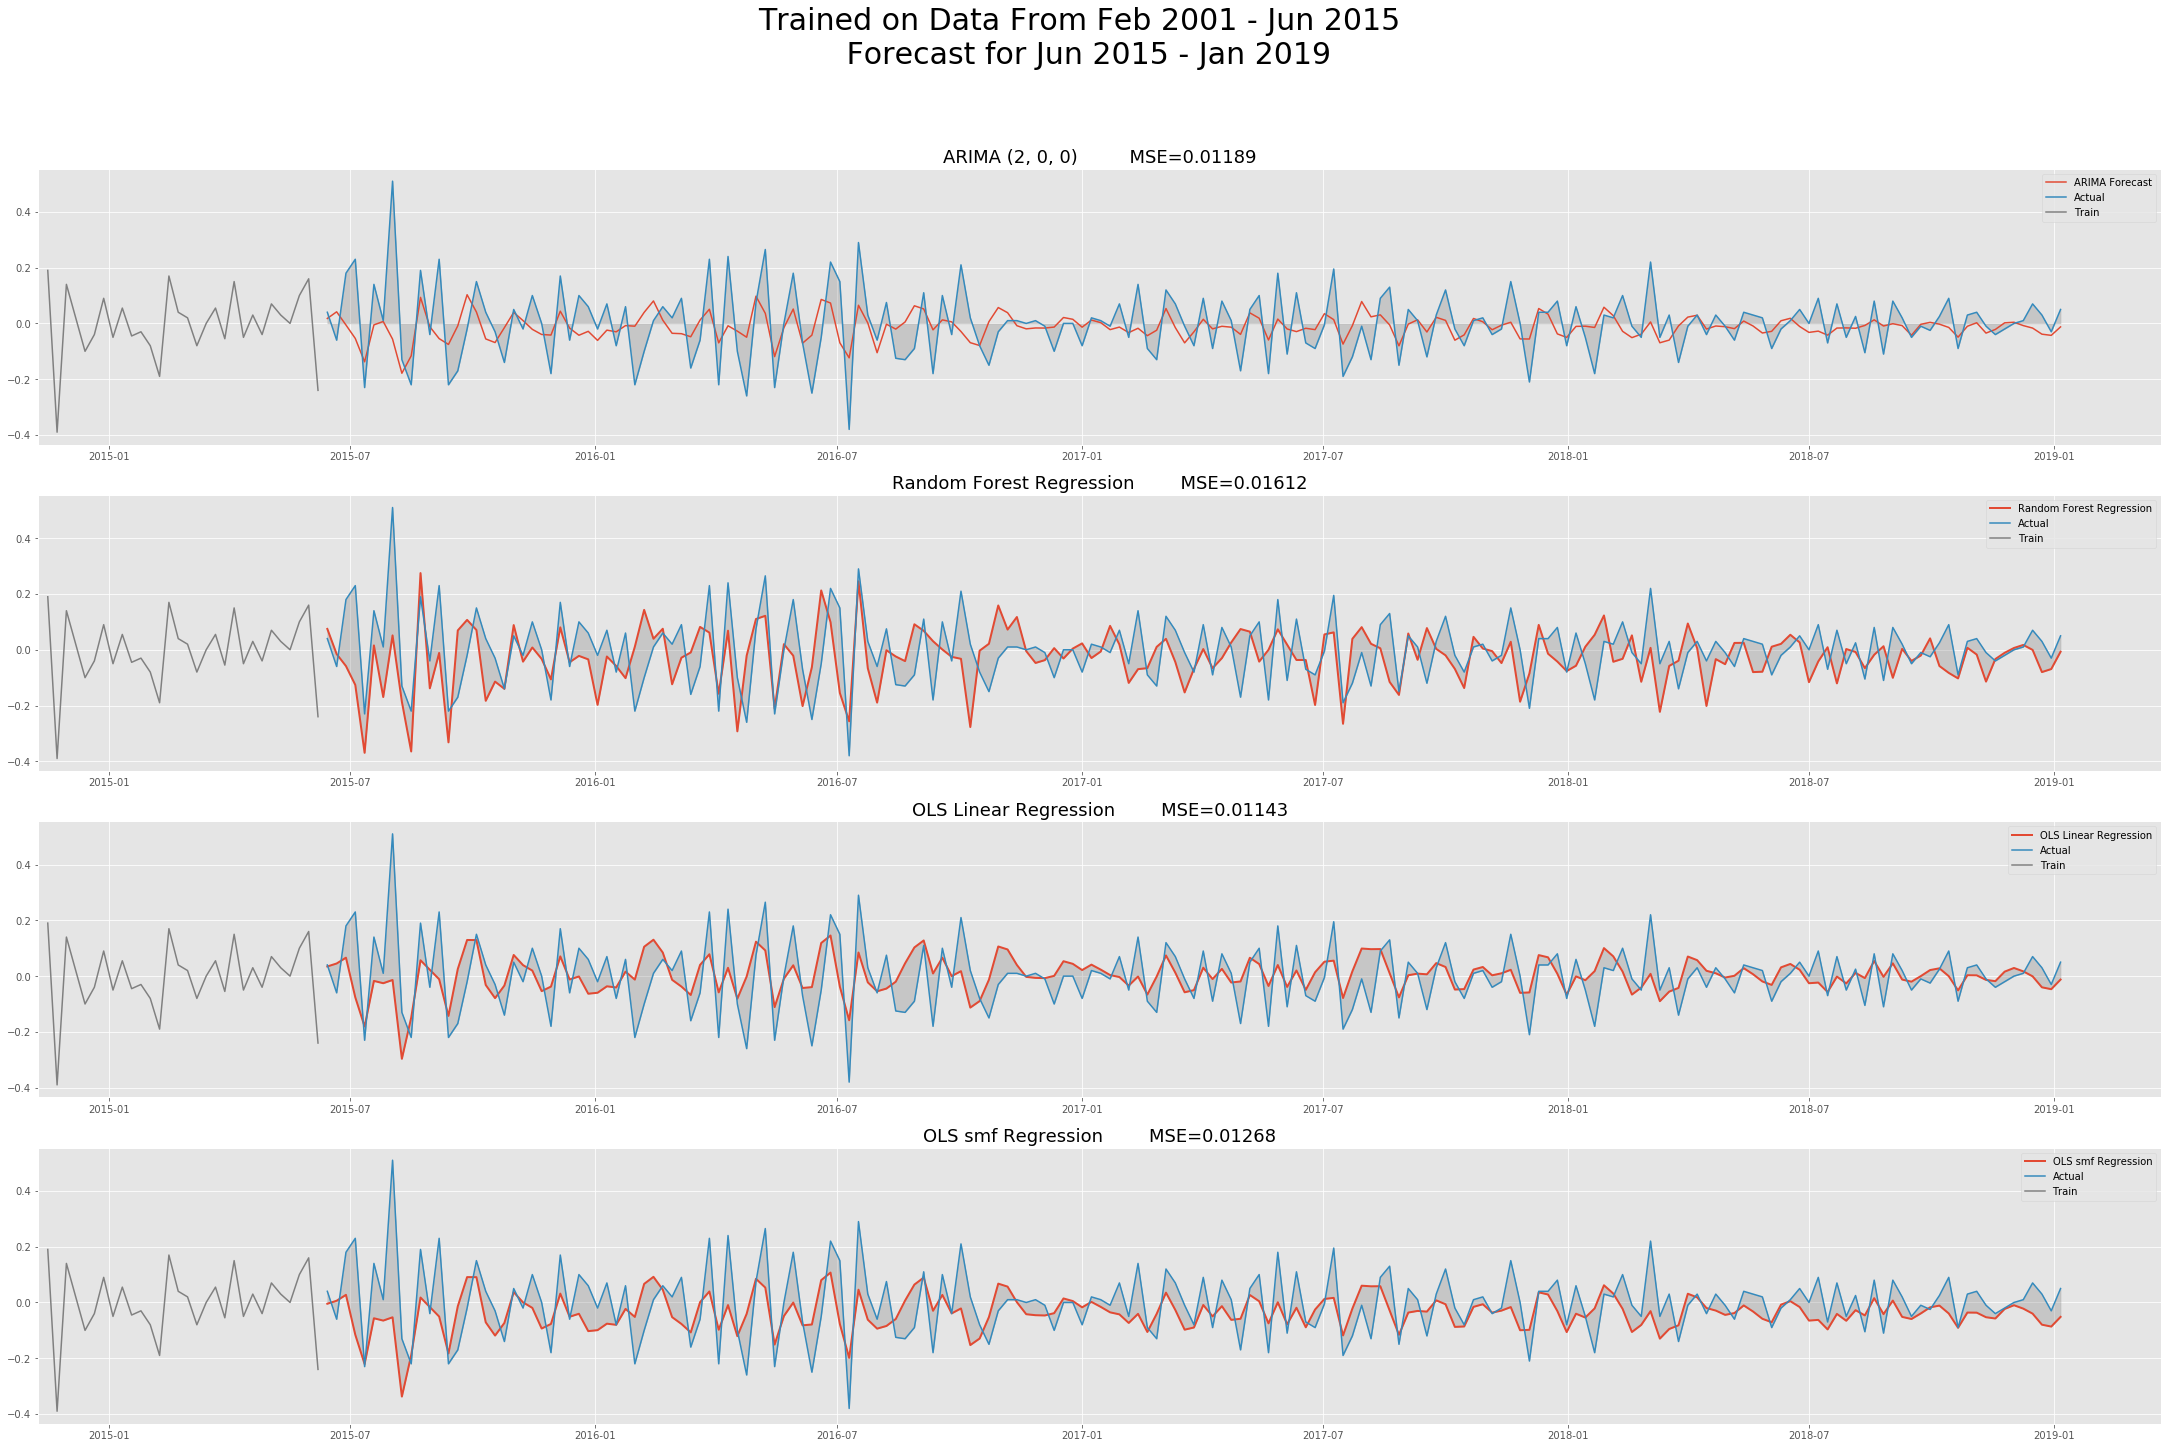

In [182]:
#predetermined order
Models().show_model(df)

In [ ]:
Models(order_method='select').show_model(df)

Please input each parameter


p: 3
d: 0
q: 1


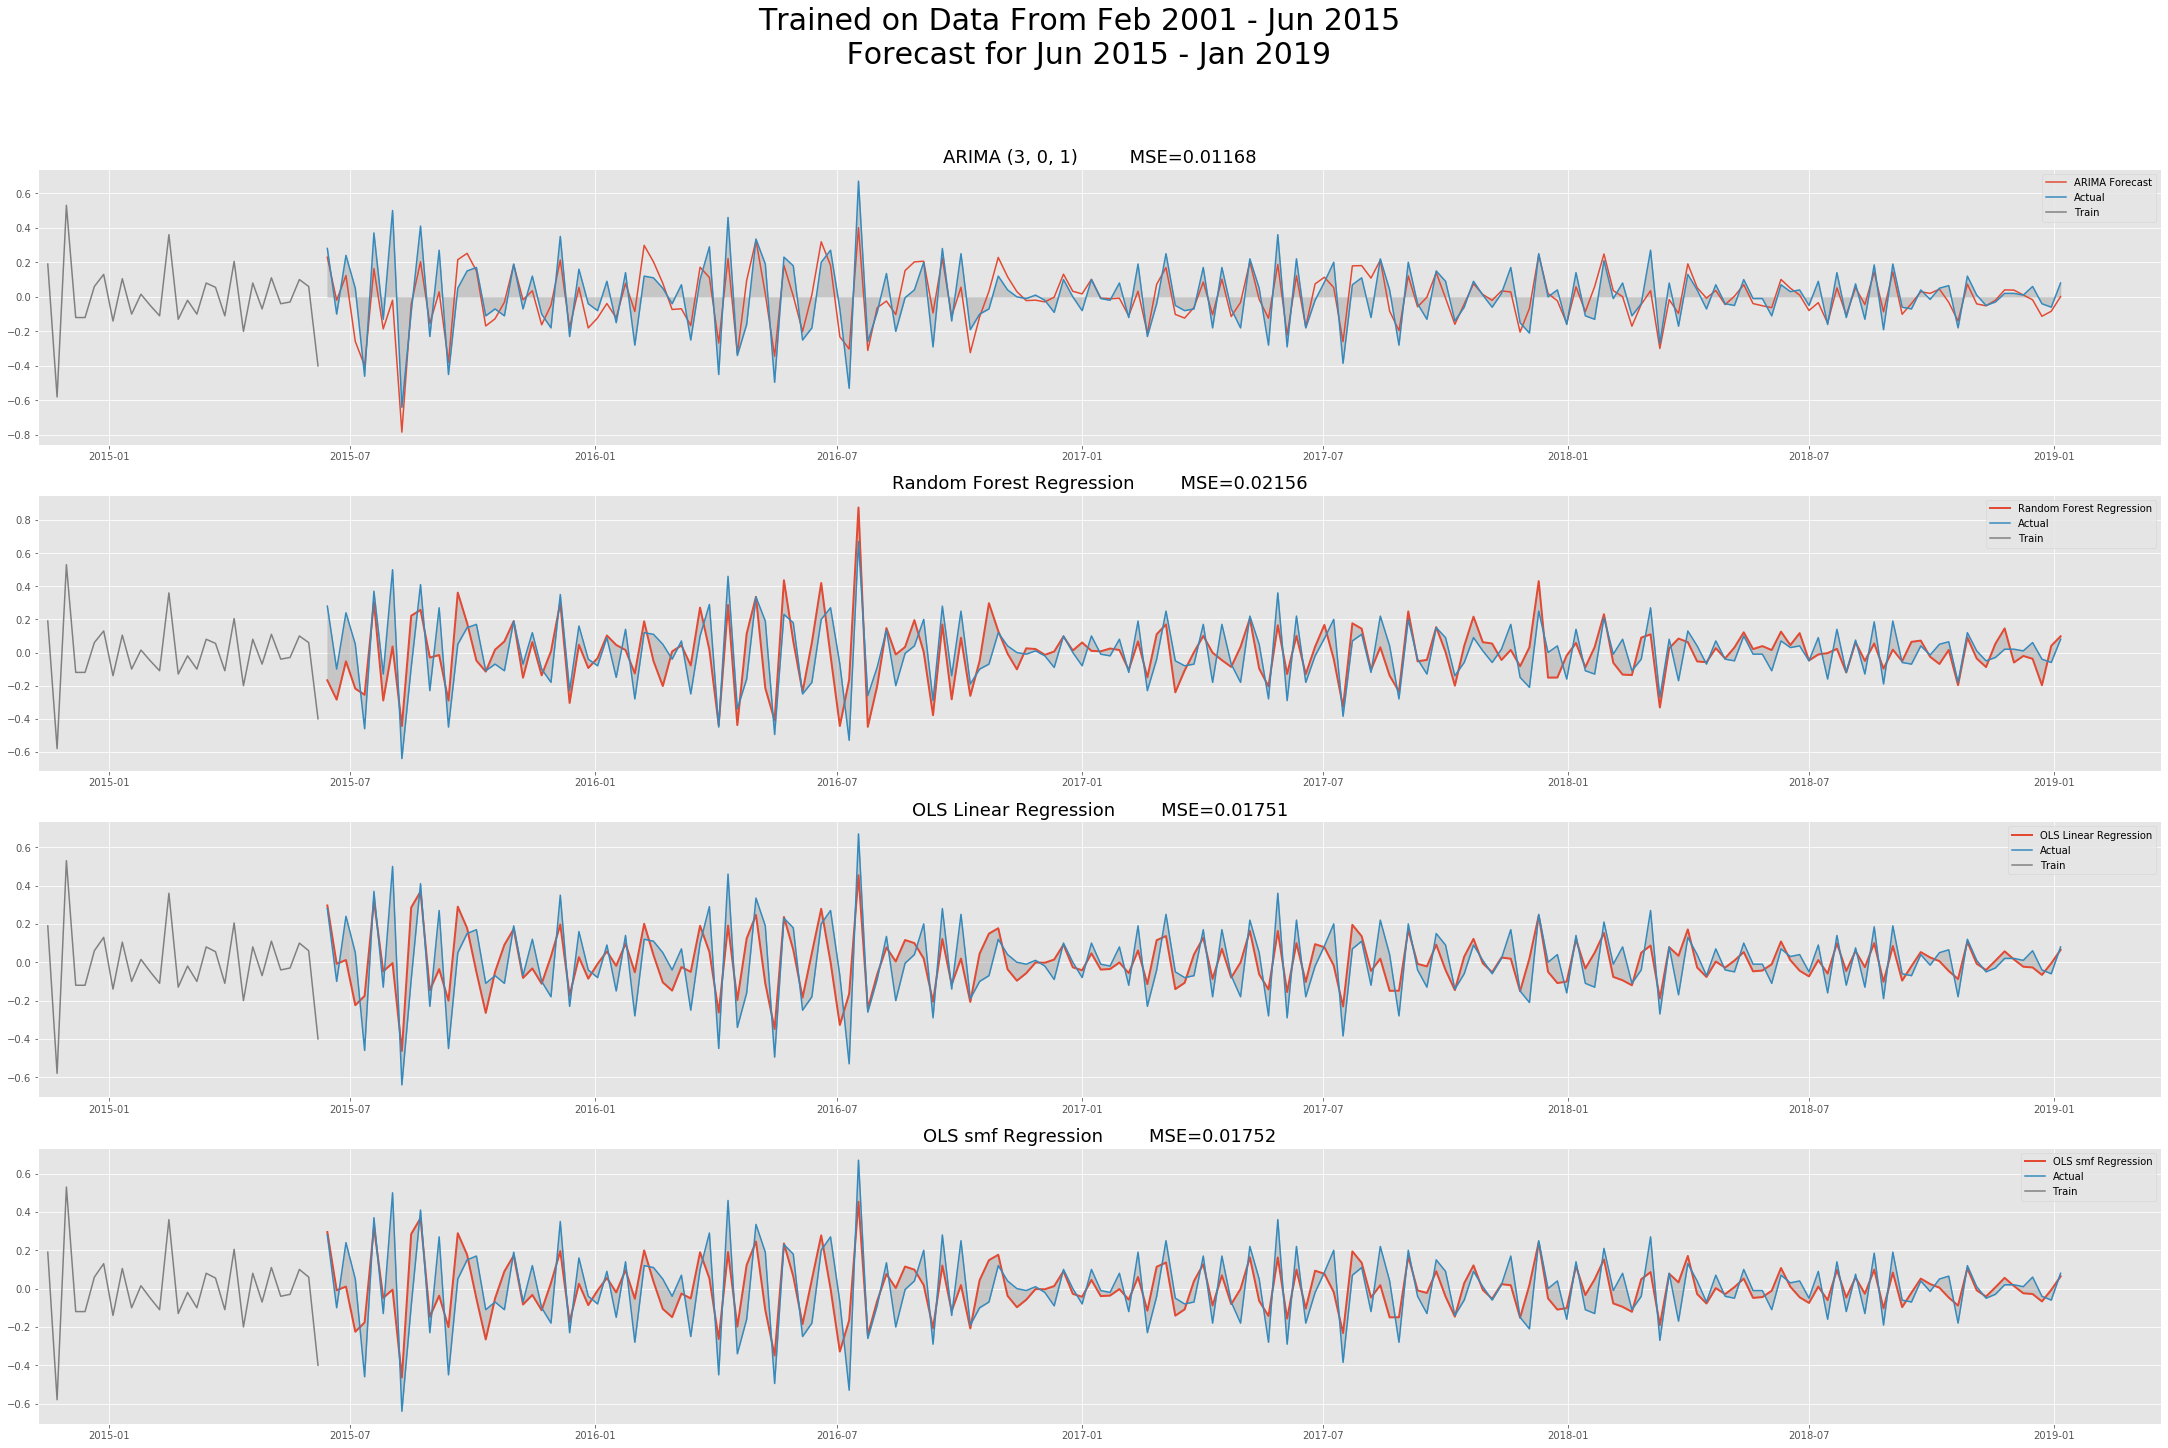

In [7]:
#Second order differenced 
#select order
Models(order_method='select').show_model(df.diff().dropna())

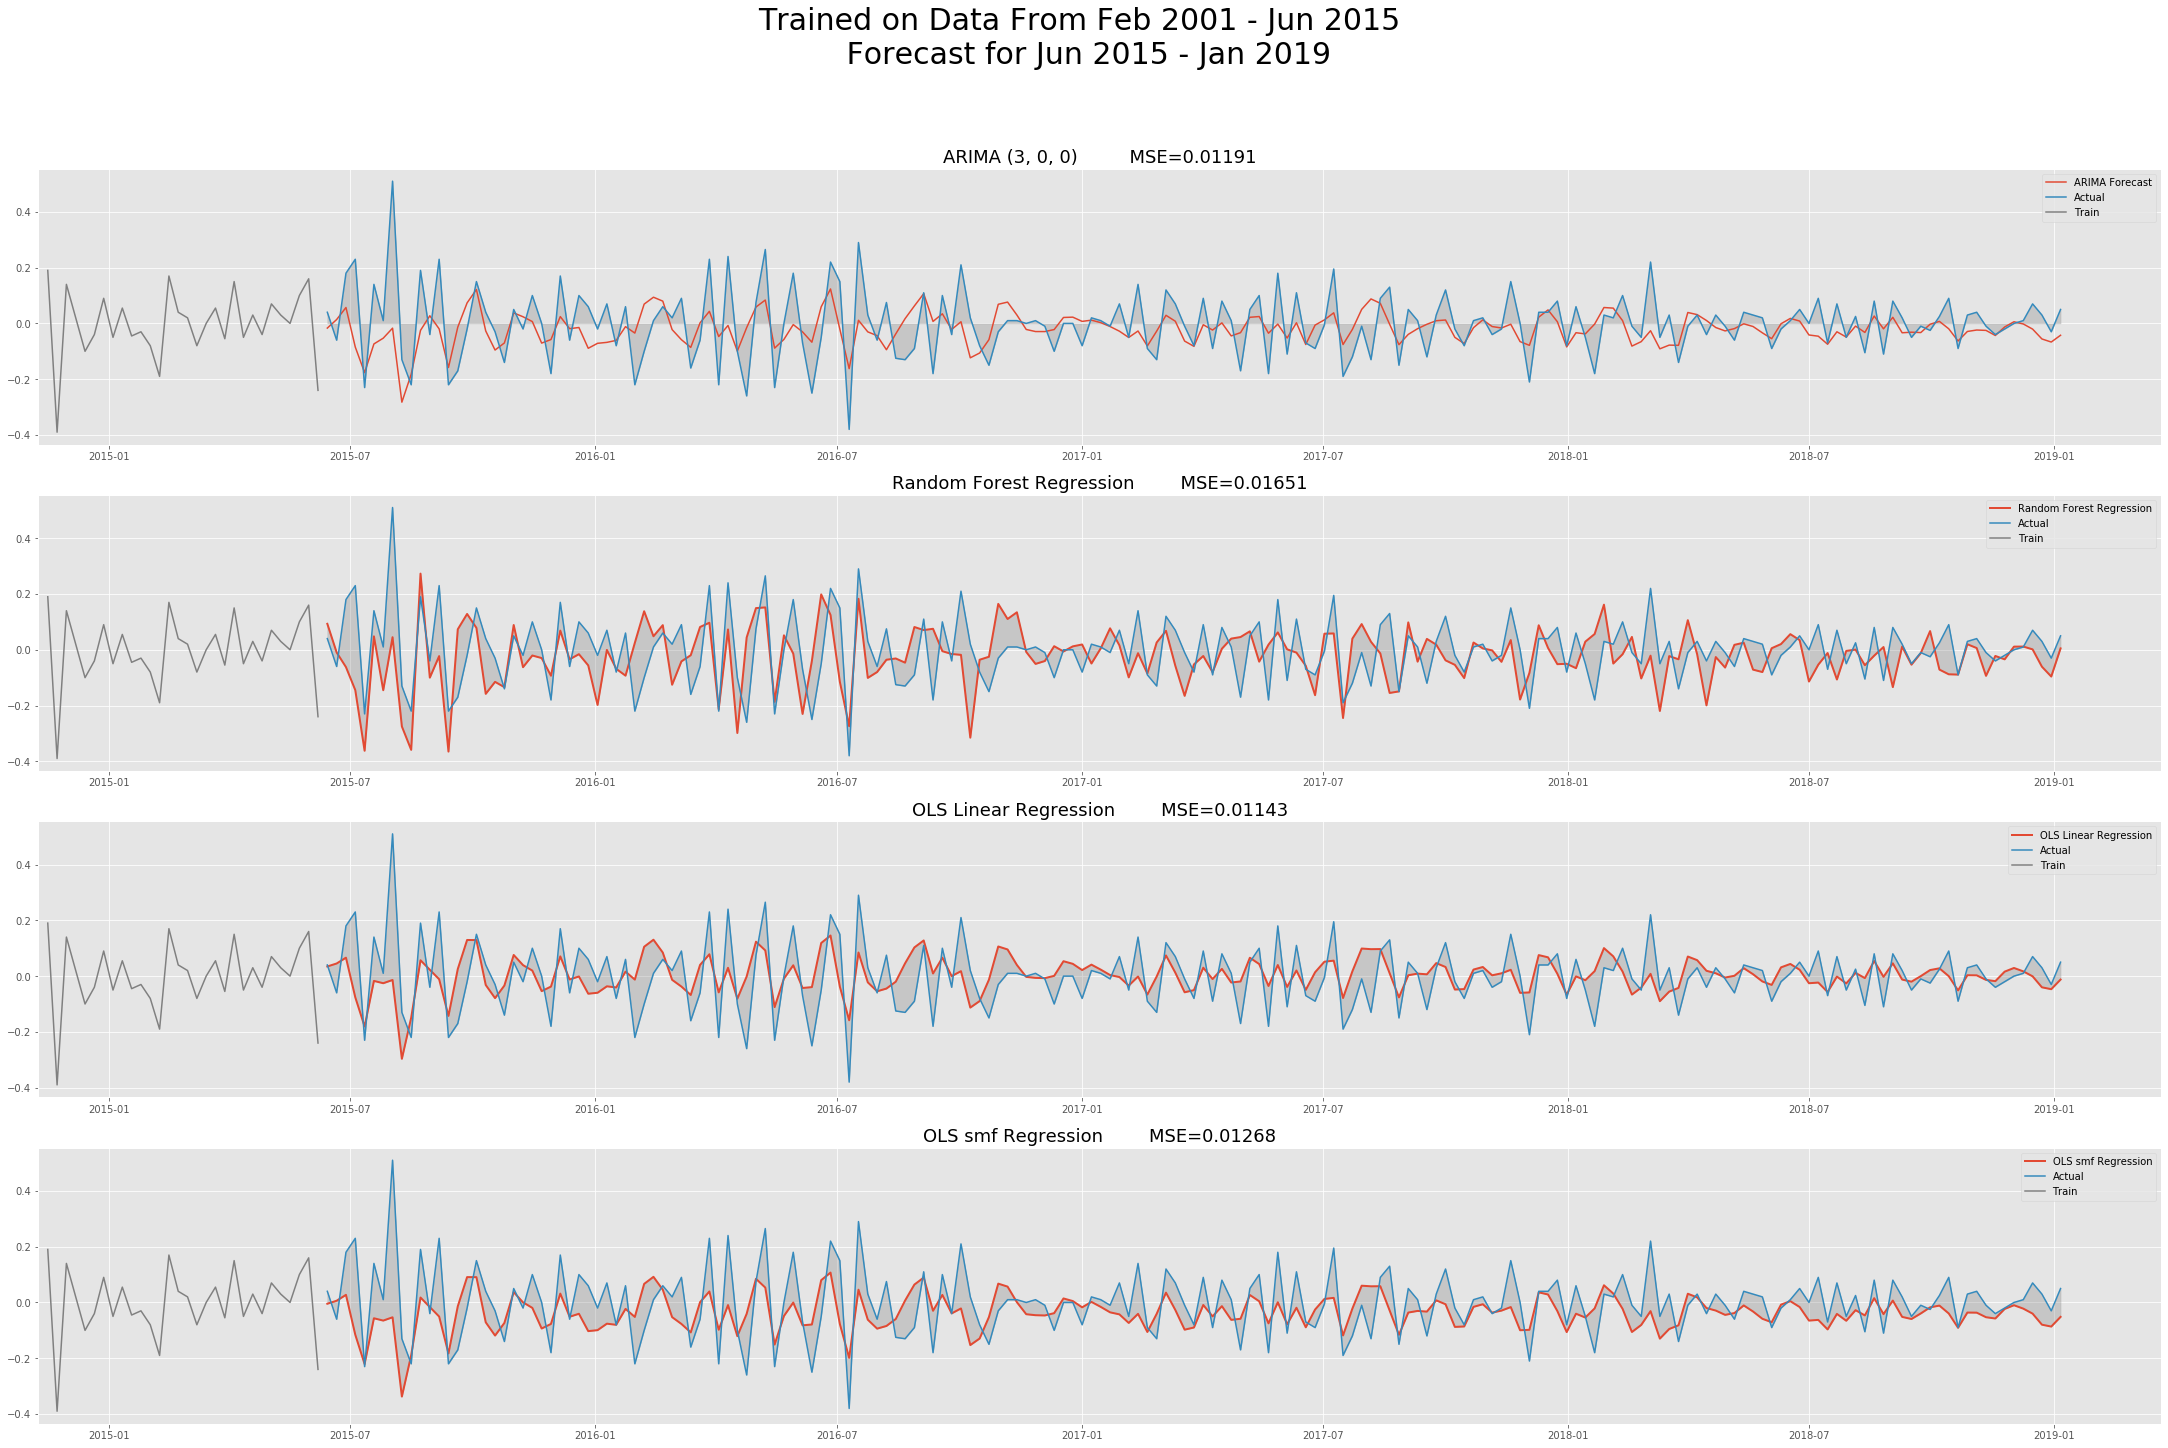

In [186]:
Models(order_method='auto').show_model(df)

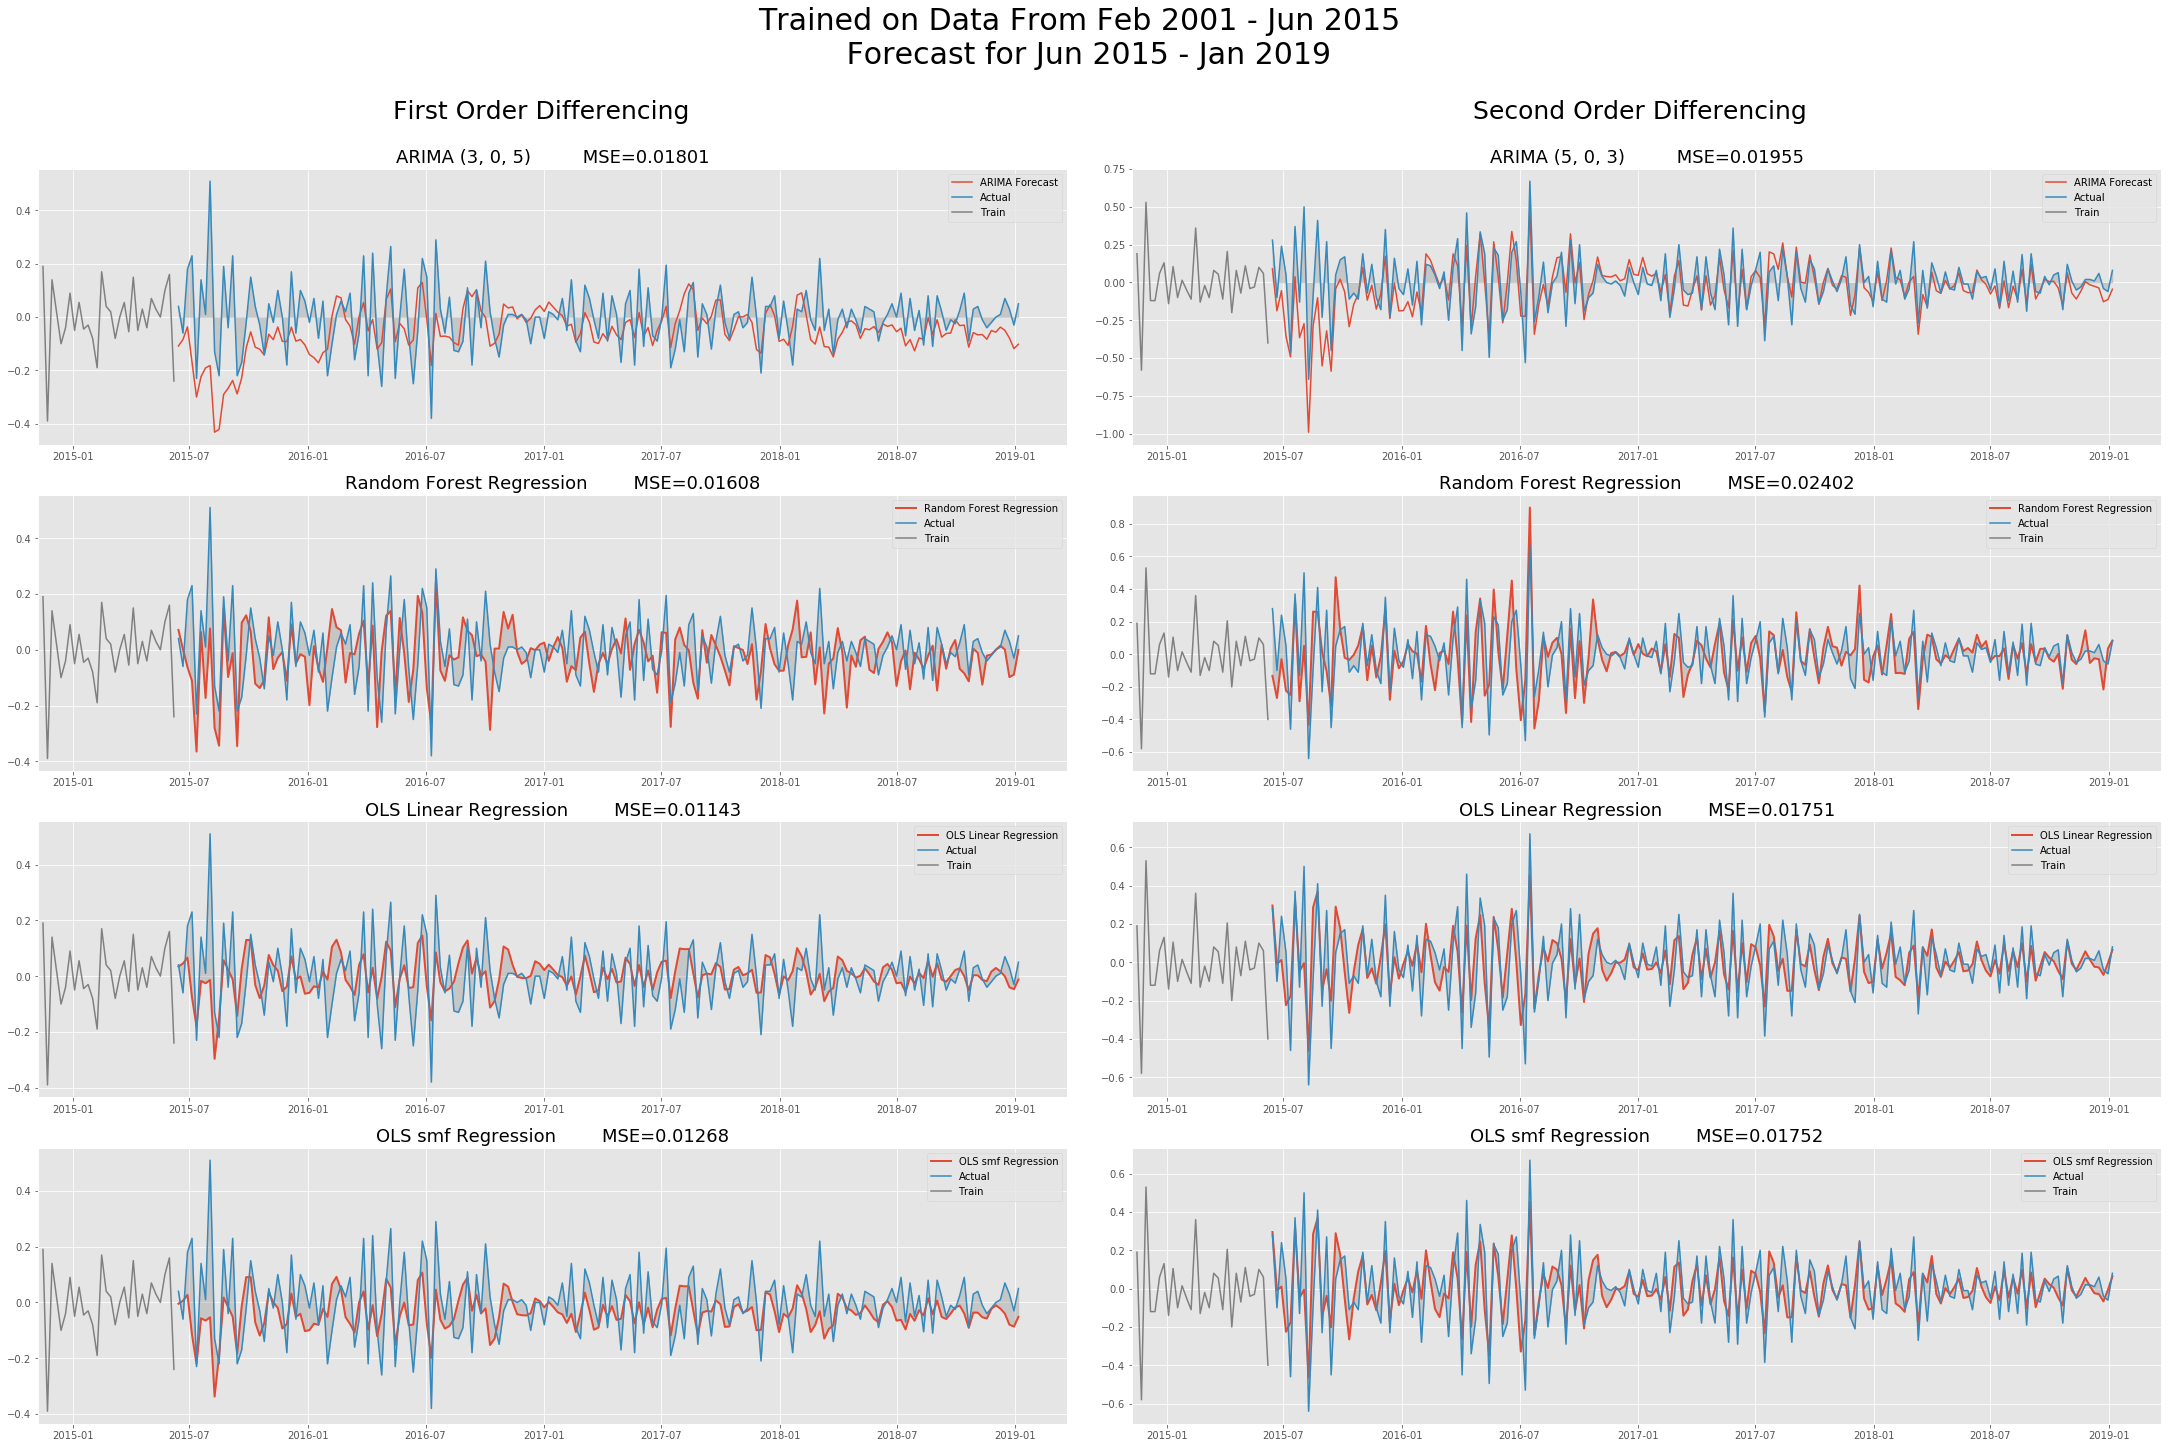

In [6]:
#Auto ARIMA function
Models(order_method='auto').show_models(df)

In [ ]:
#Manual Order Method confirmed 
t.tic()
`Models(order_method='manual').show_model(df)
t.toc()

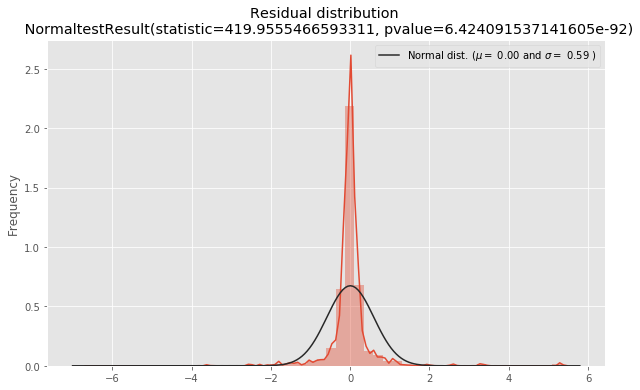

In [189]:
arima_mod = ARIMA(df, (2,0,0)).fit(disp=False)
resid = arima_mod.resid
#print(normaltest(resid))
fig = plt.figure()
ax0 = fig.add_subplot(111)
sns.distplot(resid ,fit = stats.norm, ax = ax0) 
# Get the fitted parameters used by the function
(mu, sigma) = stats.norm.fit(resid)
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')
plt.title(f'Residual distribution \n {normaltest(resid)}')
plt.show()

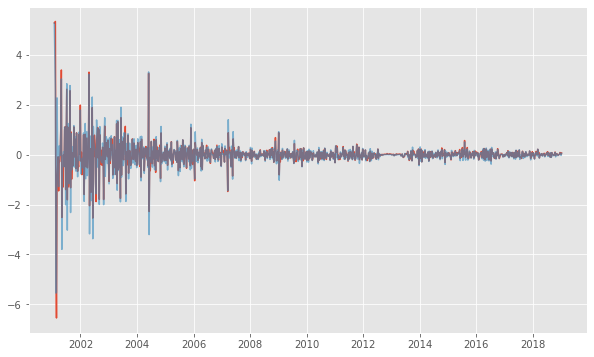

In [195]:
plt.plot(arima_mod.resid)
plt.plot(df,alpha=.6)

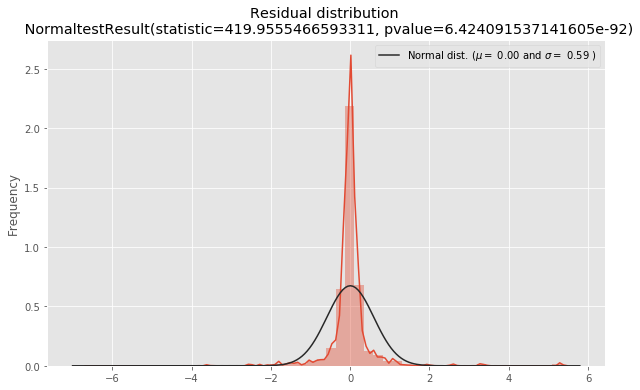

In [190]:
arima_mod = ARIMA(df, (2,0,0)).fit()
resid = arima_mod.resid
#print(normaltest(resid))
fig = plt.figure()
ax0 = fig.add_subplot(111)
sns.distplot(resid ,fit = stats.norm, ax = ax0) 
# Get the fitted parameters used by the function
(mu, sigma) = stats.norm.fit(resid)
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')
plt.title(f'Residual distribution \n {normaltest(resid)}')
plt.show()

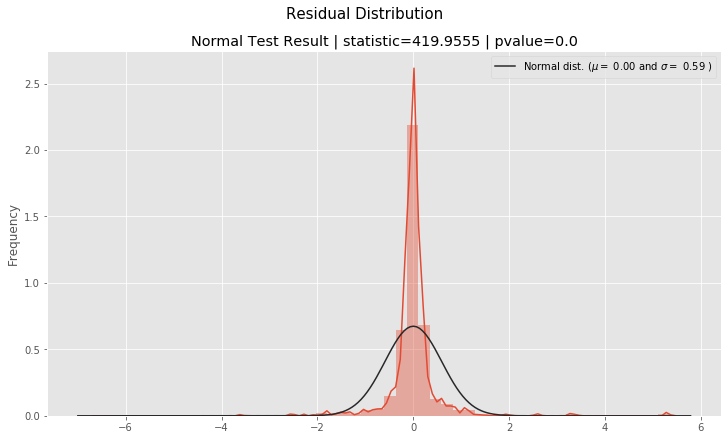

In [267]:
arima_mod = ARIMA(df, (2,0,0)).fit()
resid = arima_mod.resid
fig = plt.figure(constrained_layout=True)
ax0 = fig.add_subplot(111)
sns.distplot(resid ,fit = stats.norm, ax = ax0) 
# Get the fitted parameters used by the function
(mu, sigma) = stats.norm.fit(resid)
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')
plt.suptitle('Residual Distribution', fontsize=(15))
plt.title(f'Normal Test Result | statistic={round(normaltest(resid)[0],4)} | pvalue={round(normaltest(resid)[1],5)}')
plt.show()

In [204]:
round(normaltest(resid)[0],5), round(normaltest(resid)[1],5)

(419.95555, 0.0)

In [208]:
normaltest(resid)

NormaltestResult(statistic=419.9555466593311, pvalue=6.424091537141605e-92)

In [233]:
float(str(normaltest(resid))[:-1].split('(')[1].split(',')[0][10:19])

419.95554

In [239]:
str(normaltest(resid)).split('(')[0]

'NormaltestResult'

In [268]:
y_preds, y_train, [train_s, train_e, pred_s, pred_e], model_type = Models().regression(df)

In [269]:
y_preds

actual  randomforest  olslinear    olssmf
installation_date                                           
2015-06-14           0.04       0.06035   0.034598 -0.004546
2015-06-21          -0.06      -0.03740   0.045233  0.006176
2015-06-28           0.18      -0.09345   0.066137  0.027291
2015-07-05           0.23      -0.10900  -0.076019 -0.115702
2015-07-12          -0.23      -0.31850  -0.180500 -0.220736
...                   ...           ...        ...       ...
2018-12-09           0.01       0.00860   0.017052 -0.022116
2018-12-16           0.07      -0.00634  -0.000798 -0.040069
2018-12-23           0.03      -0.06500  -0.040145 -0.079634
2018-12-30          -0.03      -0.07675  -0.046890 -0.086425
2019-01-06           0.05       0.01215  -0.012336 -0.051703

[187 rows x 4 columns]

In [312]:
rf,ols_lin,ols_smf = Models().regressor_fits(df)

In [ ]:
ols_lin.resid

In [273]:
X_train, y_train, X_test, y_test = Models().lag_train_test(df)

In [275]:
sm.OLS(y_train, X_train).fit().resid

NormaltestResult(statistic=407.0198538682596, pvalue=4.1377259204411954e-89)

In [307]:
ARIMA(df, (2,0,0)).fit().resid

installation_date
2001-01-28    5.278429
2001-02-04    5.293746
2001-02-11    5.339230
2001-02-18   -3.594294
2001-02-25   -6.547143
                ...   
2018-12-09    0.017842
2018-12-16    0.086681
2018-12-23    0.068614
2018-12-30    0.012841
2019-01-06    0.062426
Freq: W-SUN, Length: 937, dtype: float64

In [319]:
rf.predict(X)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [327]:
y_test.index

DatetimeIndex(['2015-06-14', '2015-06-21', '2015-06-28', '2015-07-05',
               '2015-07-12', '2015-07-19', '2015-07-26', '2015-08-02',
               '2015-08-09', '2015-08-16',
               ...
               '2018-11-04', '2018-11-11', '2018-11-18', '2018-11-25',
               '2018-12-02', '2018-12-09', '2018-12-16', '2018-12-23',
               '2018-12-30', '2019-01-06'],
              dtype='datetime64[ns]', name='installation_date', length=187, freq='W-SUN')

In [344]:
y_test - pd.DataFrame(rf.predict(X_test)).set_index(y_test.index).rename(columns={0:"cost_per_watt"})

cost_per_watt
installation_date               
2015-06-14               0.03355
2015-06-21              -0.00415
2015-06-28               0.28645
2015-07-05               0.35025
2015-07-12               0.10290
...                          ...
2018-12-09               0.00170
2018-12-16               0.07809
2018-12-23               0.10140
2018-12-30               0.07270
2019-01-06               0.03195

[187 rows x 1 columns]

In [ ]:
rf,ols_lin,ols_smf = Models().regressor_fits(df)

In [445]:
np.array(y_test)- rf.predict(X_test)

array([[ 0.00765,  0.0837 ,  0.15795, ...,  0.0858 ,  0.104  ,  0.01775],
       [-0.09235, -0.0163 ,  0.05795, ..., -0.0142 ,  0.004  , -0.08225],
       [ 0.14765,  0.2237 ,  0.29795, ...,  0.2258 ,  0.244  ,  0.15775],
       ...,
       [-0.00235,  0.0737 ,  0.14795, ...,  0.0758 ,  0.094  ,  0.00775],
       [-0.06235,  0.0137 ,  0.08795, ...,  0.0158 ,  0.034  , -0.05225],
       [ 0.01765,  0.0937 ,  0.16795, ...,  0.0958 ,  0.114  ,  0.02775]])

In [ ]:
 y_test - pd.DataFrame(rf.predict(X_test)).set_index(y_test.index).rename(columns={0:"cost_per_watt"})

In [468]:
ARIMA_resid = ARIMA(df, (2,0,0)).fit().resid
rf,ols_lin,ols_smf = Models().regressor_fits(df)
OLS_smf_resid = pd.DataFrame(ols_smf.resid)
OLS_lin_resid = pd.DataFrame(ols_lin.resid)
RandomForest_resid = y_test.cost_per_watt.values - rf.predict(X_test)
resid_list = [ARIMA_resid,OLS_smf_resid,OLS_lin_resid,RandomForest_resid]
resid_models = ["ARIMA_resid", "OLS_smf_resid", "OLS_lin_resid", "RandomForest_resid"]

In [578]:
y_test.cost_per_watt - rf.predict(X_test)

installation_date
2015-06-14   -0.05260
2015-06-21    0.00675
2015-06-28    0.25910
2015-07-05    0.34785
2015-07-12    0.13920
               ...   
2018-12-09   -0.00860
2018-12-16    0.08656
2018-12-23    0.09405
2018-12-30    0.05060
2019-01-06    0.05305
Freq: W-SUN, Name: cost_per_watt, Length: 187, dtype: float64

In [467]:
y_test.cost_per_watt.values - rf.predict(X_test)

array([ 7.65000000e-03, -1.63000000e-02,  2.97950000e-01,  3.48350000e-01,
        1.55300000e-01,  4.51000000e-02,  1.99950000e-01,  4.74600000e-01,
        1.19950000e-01,  1.28350000e-01, -1.05100000e-01,  8.34000000e-02,
        2.45550000e-01,  1.29700000e-01, -2.56500000e-01, -1.34650000e-01,
        4.21000000e-02,  2.00600000e-01,  1.17150000e-01, -1.15000000e-03,
       -5.58500000e-02,  2.28000000e-02,  1.33550000e-01,  1.12500000e-02,
       -8.42000000e-02,  1.22850000e-01, -2.35000000e-02,  1.14350000e-01,
        1.06000000e-01,  1.84300000e-01,  5.90500000e-02, -1.23000000e-02,
        1.59550000e-01, -2.27100000e-01, -2.53050000e-01, -5.89500000e-02,
       -1.93000000e-02,  1.41700000e-01,  1.03450000e-01, -1.57200000e-01,
       -1.38350000e-01,  1.38700000e-01, -1.23500000e-01,  1.48450000e-01,
        2.08650000e-01, -2.51350000e-01, -3.75000000e-02,  1.32700000e-01,
       -3.51500000e-02, -5.45000000e-02,  2.16850000e-01,  1.35800000e-01,
       -1.84700000e-01, -

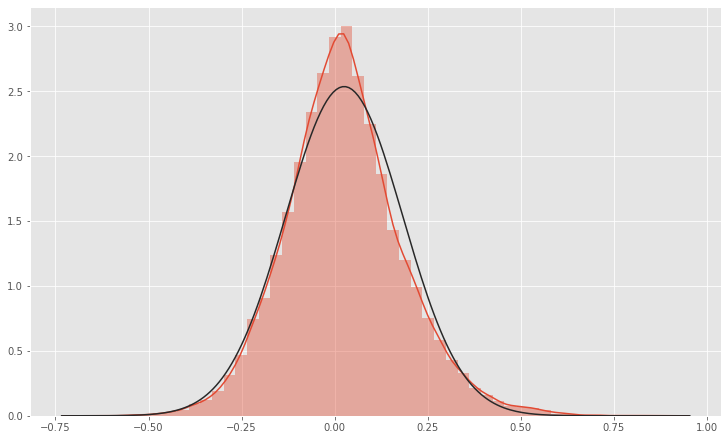

In [448]:
fig = plt.figure(constrained_layout=True)
ax0 = fig.add_subplot(111)
sns.distplot(np.array(y_test)- rf.predict(X_test) ,fit = stats.norm, ax = ax0) 

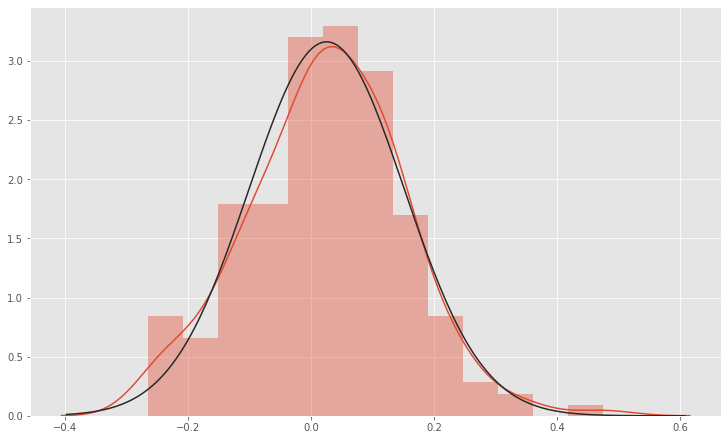

In [447]:
fig = plt.figure(constrained_layout=True)
ax0 = fig.add_subplot(111)
sns.distplot(RandomForest_resid ,fit = stats.norm, ax = ax0) 

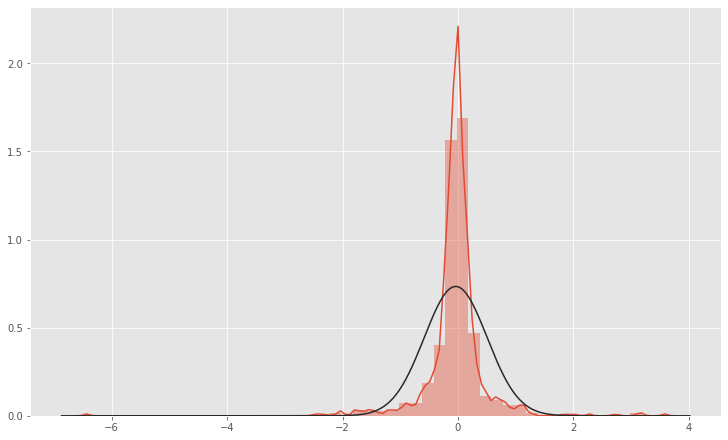

In [410]:
fig = plt.figure(constrained_layout=True)
ax0 = fig.add_subplot(111)
sns.distplot(OLS_lin_resid ,fit = stats.norm, ax = ax0) 

IndexError: index 2 is out of bounds for axis 1 with size 2

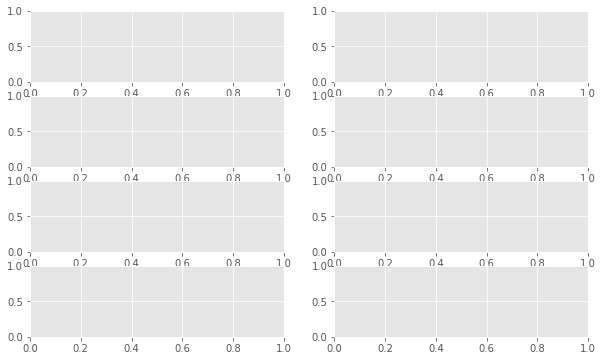

In [496]:
fig,axs = plt.subplots(4,2)
#ax[0,1] = sns.distplot(OLS_smf_resid ,fit = stats.norm)
axs[0,2] = 

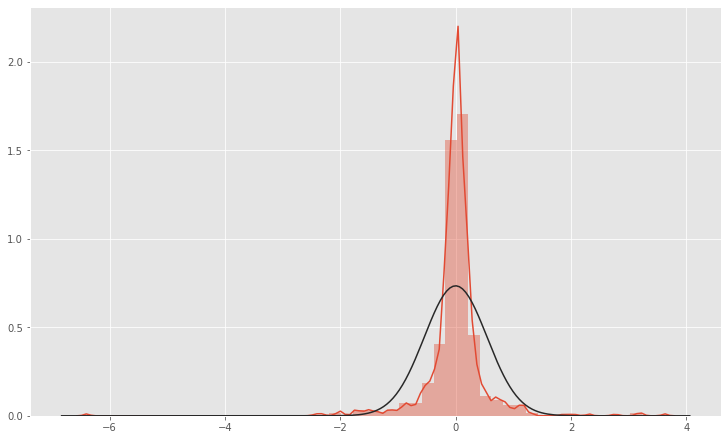

In [416]:
fig = plt.figure(constrained_layout=True)
ax0 = fig.add_subplot(111)
sns.distplot(OLS_smf_resid ,fit = stats.norm, ax = ax0) 

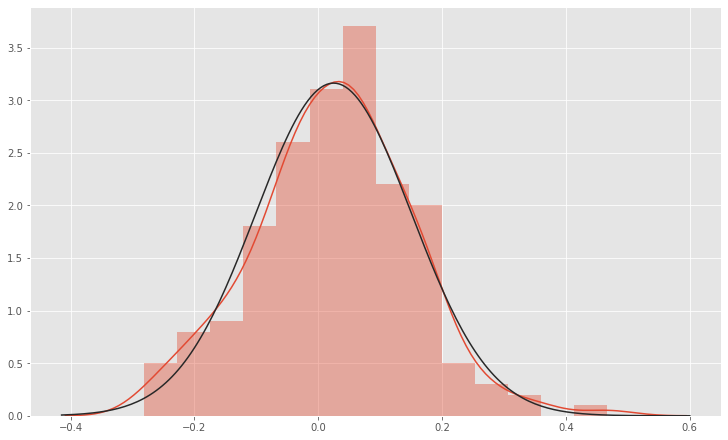

In [585]:
fig = plt.figure(constrained_layout=True)
sns.distplot(RandomForest_resid ,fit = stats.norm)

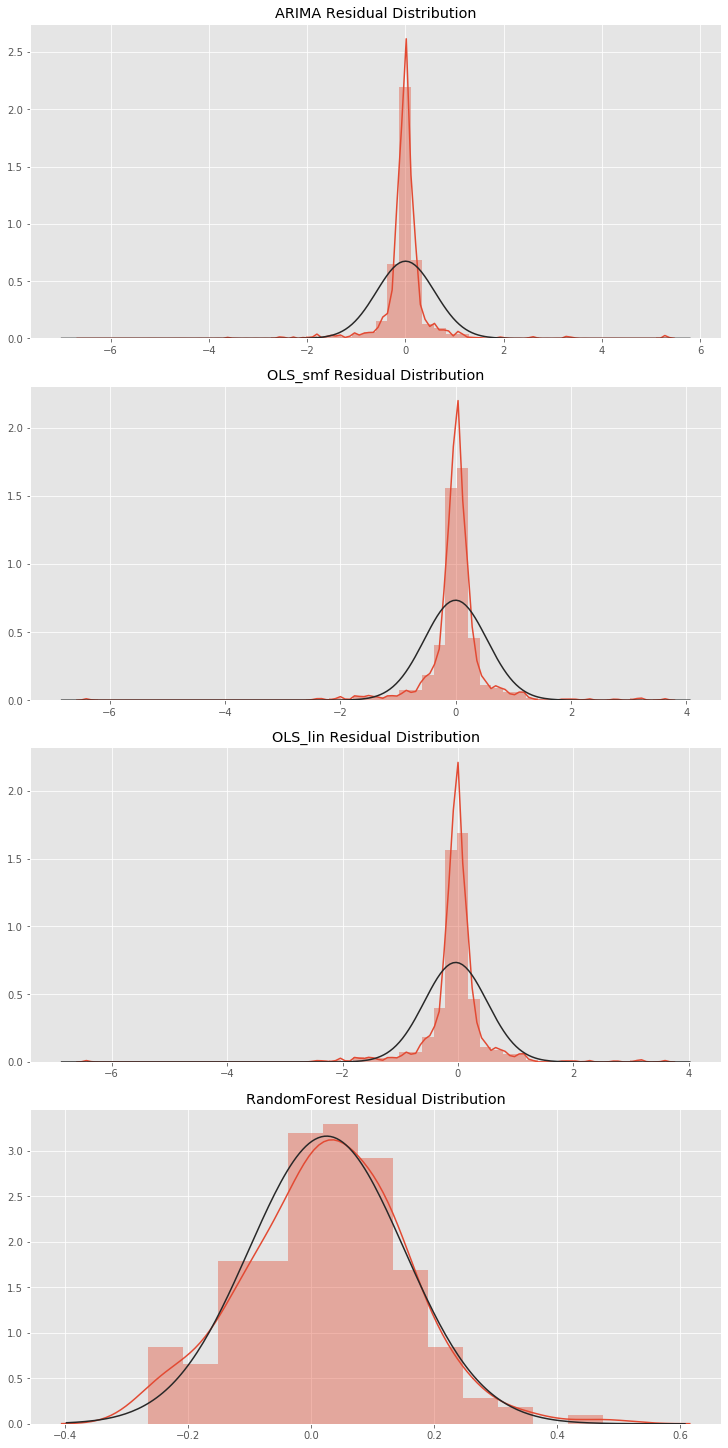

In [433]:
fig,axs = plt.subplots(4, constrained_layout=True, figsize=(10,20))
for i in range(4):
    sns.distplot(resid_list[i],fit = stats.norm, ax=axs[i])
    axs[i].set_title(f"{resid_models[i][:-6]} Residual Distribution")

AttributeError: 'Line2D' object has no property 'ax'

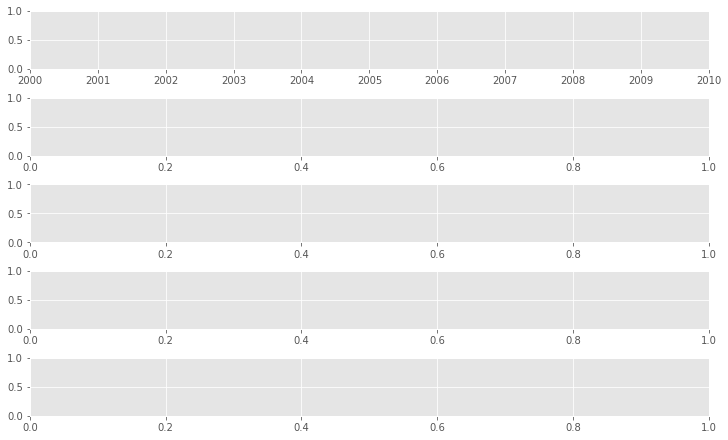

In [408]:




#fig, axs = plt.subplots(5, figsize= (30,20), constrained_layout=True)
fig,ax = plt.subplots(5, constrained_layout=True)
for i in range(1):
    ax[i].plot(resid_list[i], label=resid_models[i], ax=ax[i])

In [ ]:
ols_train, ols_test= self.lag_train_test(df, lag_len=lag_len, Xy=False)
ols_str = 'y ~ ' +" + ".join([f"Lag{i}" for i in range(1,lag_len+1)])
ols = smf.ols(ols_str, data=ols_train).fit().predict(ols_test)

In [ ]:
rf= RandomForestRegressor(n_jobs=-1).fit(X_train,y_train)

In [298]:
len(rf.predict(X_test))

187

In [305]:
y_test.cost_per_watt.values - rf.predict(X_test)

array([-6.15000000e-02, -1.18500000e-02,  2.41200000e-01,  3.72400000e-01,
        1.45500000e-01,  5.13500000e-02,  2.14100000e-01,  4.82700000e-01,
        1.60850000e-01,  1.01800000e-01, -5.37000000e-02,  5.25000000e-02,
        2.45200000e-01,  1.57550000e-01, -2.48850000e-01, -1.27450000e-01,
        7.58000000e-02,  2.16500000e-01,  9.62000000e-02, -1.48500000e-02,
       -5.67500000e-02,  3.72000000e-02,  1.14050000e-01,  1.25000000e-02,
       -6.31500000e-02,  1.08200000e-01, -2.16000000e-02,  1.33750000e-01,
        9.74000000e-02,  1.68350000e-01,  5.47500000e-02, -1.63000000e-02,
        1.52300000e-01, -2.39150000e-01, -2.47600000e-01, -7.93500000e-02,
       -2.90500000e-02,  1.31300000e-01,  1.06450000e-01, -1.63200000e-01,
       -1.32150000e-01,  1.21950000e-01, -5.72500000e-02,  1.55650000e-01,
        2.23100000e-01, -2.48550000e-01, -3.38000000e-02,  1.70700000e-01,
        1.51000000e-02, -1.95000000e-03,  2.27800000e-01,  1.22900000e-01,
       -1.68900000e-01, -

In [304]:
y_test.cost_per_watt.values

array([ 0.04 , -0.06 ,  0.18 ,  0.23 , -0.23 ,  0.14 ,  0.01 ,  0.51 ,
       -0.13 , -0.22 ,  0.19 , -0.04 ,  0.23 , -0.22 , -0.17 , -0.02 ,
        0.15 ,  0.04 , -0.03 , -0.14 ,  0.05 , -0.02 ,  0.1  ,  0.   ,
       -0.18 ,  0.17 , -0.06 ,  0.1  ,  0.06 , -0.02 ,  0.07 , -0.08 ,
        0.06 , -0.22 , -0.1  ,  0.01 ,  0.06 ,  0.02 ,  0.09 , -0.16 ,
       -0.06 ,  0.23 , -0.22 ,  0.24 , -0.1  , -0.26 ,  0.075,  0.265,
       -0.23 ,  0.   ,  0.18 , -0.07 , -0.25 , -0.05 ,  0.22 ,  0.15 ,
       -0.38 ,  0.29 ,  0.03 , -0.06 ,  0.075, -0.125, -0.13 , -0.09 ,
        0.11 , -0.18 ,  0.1  , -0.04 ,  0.21 ,  0.02 , -0.08 , -0.15 ,
       -0.03 ,  0.01 ,  0.01 ,  0.   ,  0.01 , -0.01 , -0.1  ,  0.   ,
        0.   , -0.08 ,  0.02 ,  0.01 , -0.01 ,  0.07 , -0.05 ,  0.14 ,
       -0.09 , -0.13 ,  0.12 ,  0.07 , -0.01 , -0.08 ,  0.09 , -0.09 ,
        0.08 ,  0.01 , -0.17 ,  0.05 ,  0.1  , -0.18 ,  0.18 , -0.11 ,
        0.11 , -0.07 , -0.09 , -0.005,  0.195, -0.19 , -0.12 , -0.01 ,
      

In [278]:
%autoreload

In [279]:
rf,ols_lin,ols = Models().regressor_fits(df)

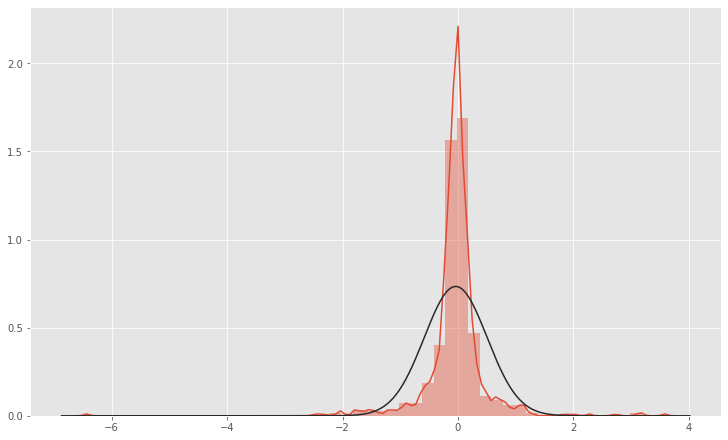

In [276]:
fig = plt.figure(constrained_layout=True)
ax0 = fig.add_subplot(111)
sns.distplot(sm.OLS(y_train, X_train).fit().resid ,fit = stats.norm, ax = ax0) 

In [271]:
rf = RandomForestRegressor(n_jobs=-1).fit().res

array([ 7.16500000e-02, -7.60000000e-02, -8.73000000e-02, -1.21250000e-01,
       -3.42250000e-01,  6.91000000e-02, -2.02000000e-01,  3.63500000e-02,
       -2.54900000e-01, -3.19900000e-01,  3.15750000e-01, -9.06000000e-02,
        8.30000000e-03, -3.42400000e-01,  7.07500000e-02,  1.36300000e-01,
        6.97000000e-02, -1.75250000e-01, -9.83000000e-02, -1.14350000e-01,
        1.11950000e-01, -7.74500000e-02, -1.47000000e-02, -8.55000000e-03,
       -1.18300000e-01,  1.08750000e-01, -2.90000000e-02, -7.05000000e-03,
       -5.76500000e-02, -1.73900000e-01,  4.53000000e-02, -7.02500000e-02,
       -9.03000000e-02,  1.49500000e-02,  1.50200000e-01,  8.34500000e-02,
        7.81000000e-02, -1.22200000e-01, -2.58500000e-02, -2.92000000e-02,
        7.63500000e-02,  9.41000000e-02, -1.48850000e-01,  7.94000000e-02,
       -3.00600000e-01,  1.22000000e-02,  5.18000000e-02,  1.13550000e-01,
       -2.08050000e-01,  1.13800000e-01,  3.95000000e-03, -2.02950000e-01,
       -5.20000000e-02,  

In [557]:
%autoreload

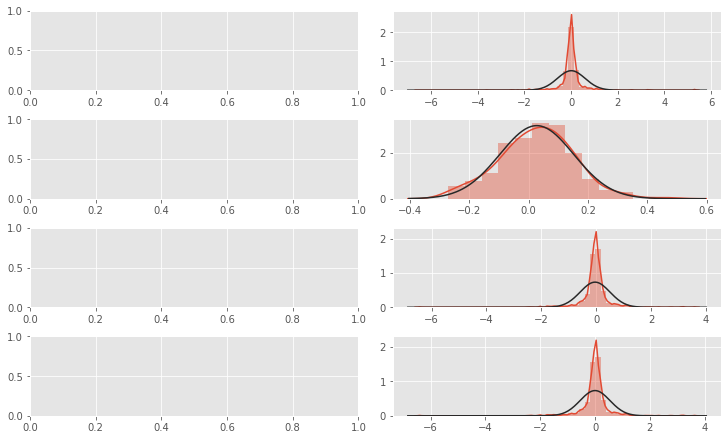

In [516]:
fig,ax = plt.subplots(4,2,constrained_layout=True)
for i in range(1)
ax[0,1] = sns.distplot(ARIMA_resid, fit=stats.norm, ax=ax[0,1])
ax[1,1] = sns.distplot(RandomForest_resid ,fit = stats.norm, ax = ax[1,1]) 
ax[2,1] = sns.distplot(OLS_lin_resid, fit=stats.norm, ax=ax[2,1])
ax[3,1] = sns.distplot(OLS_smf_resid, fit=stats.norm, ax=ax[3,1])

SyntaxError: invalid syntax (<string>, line 2)

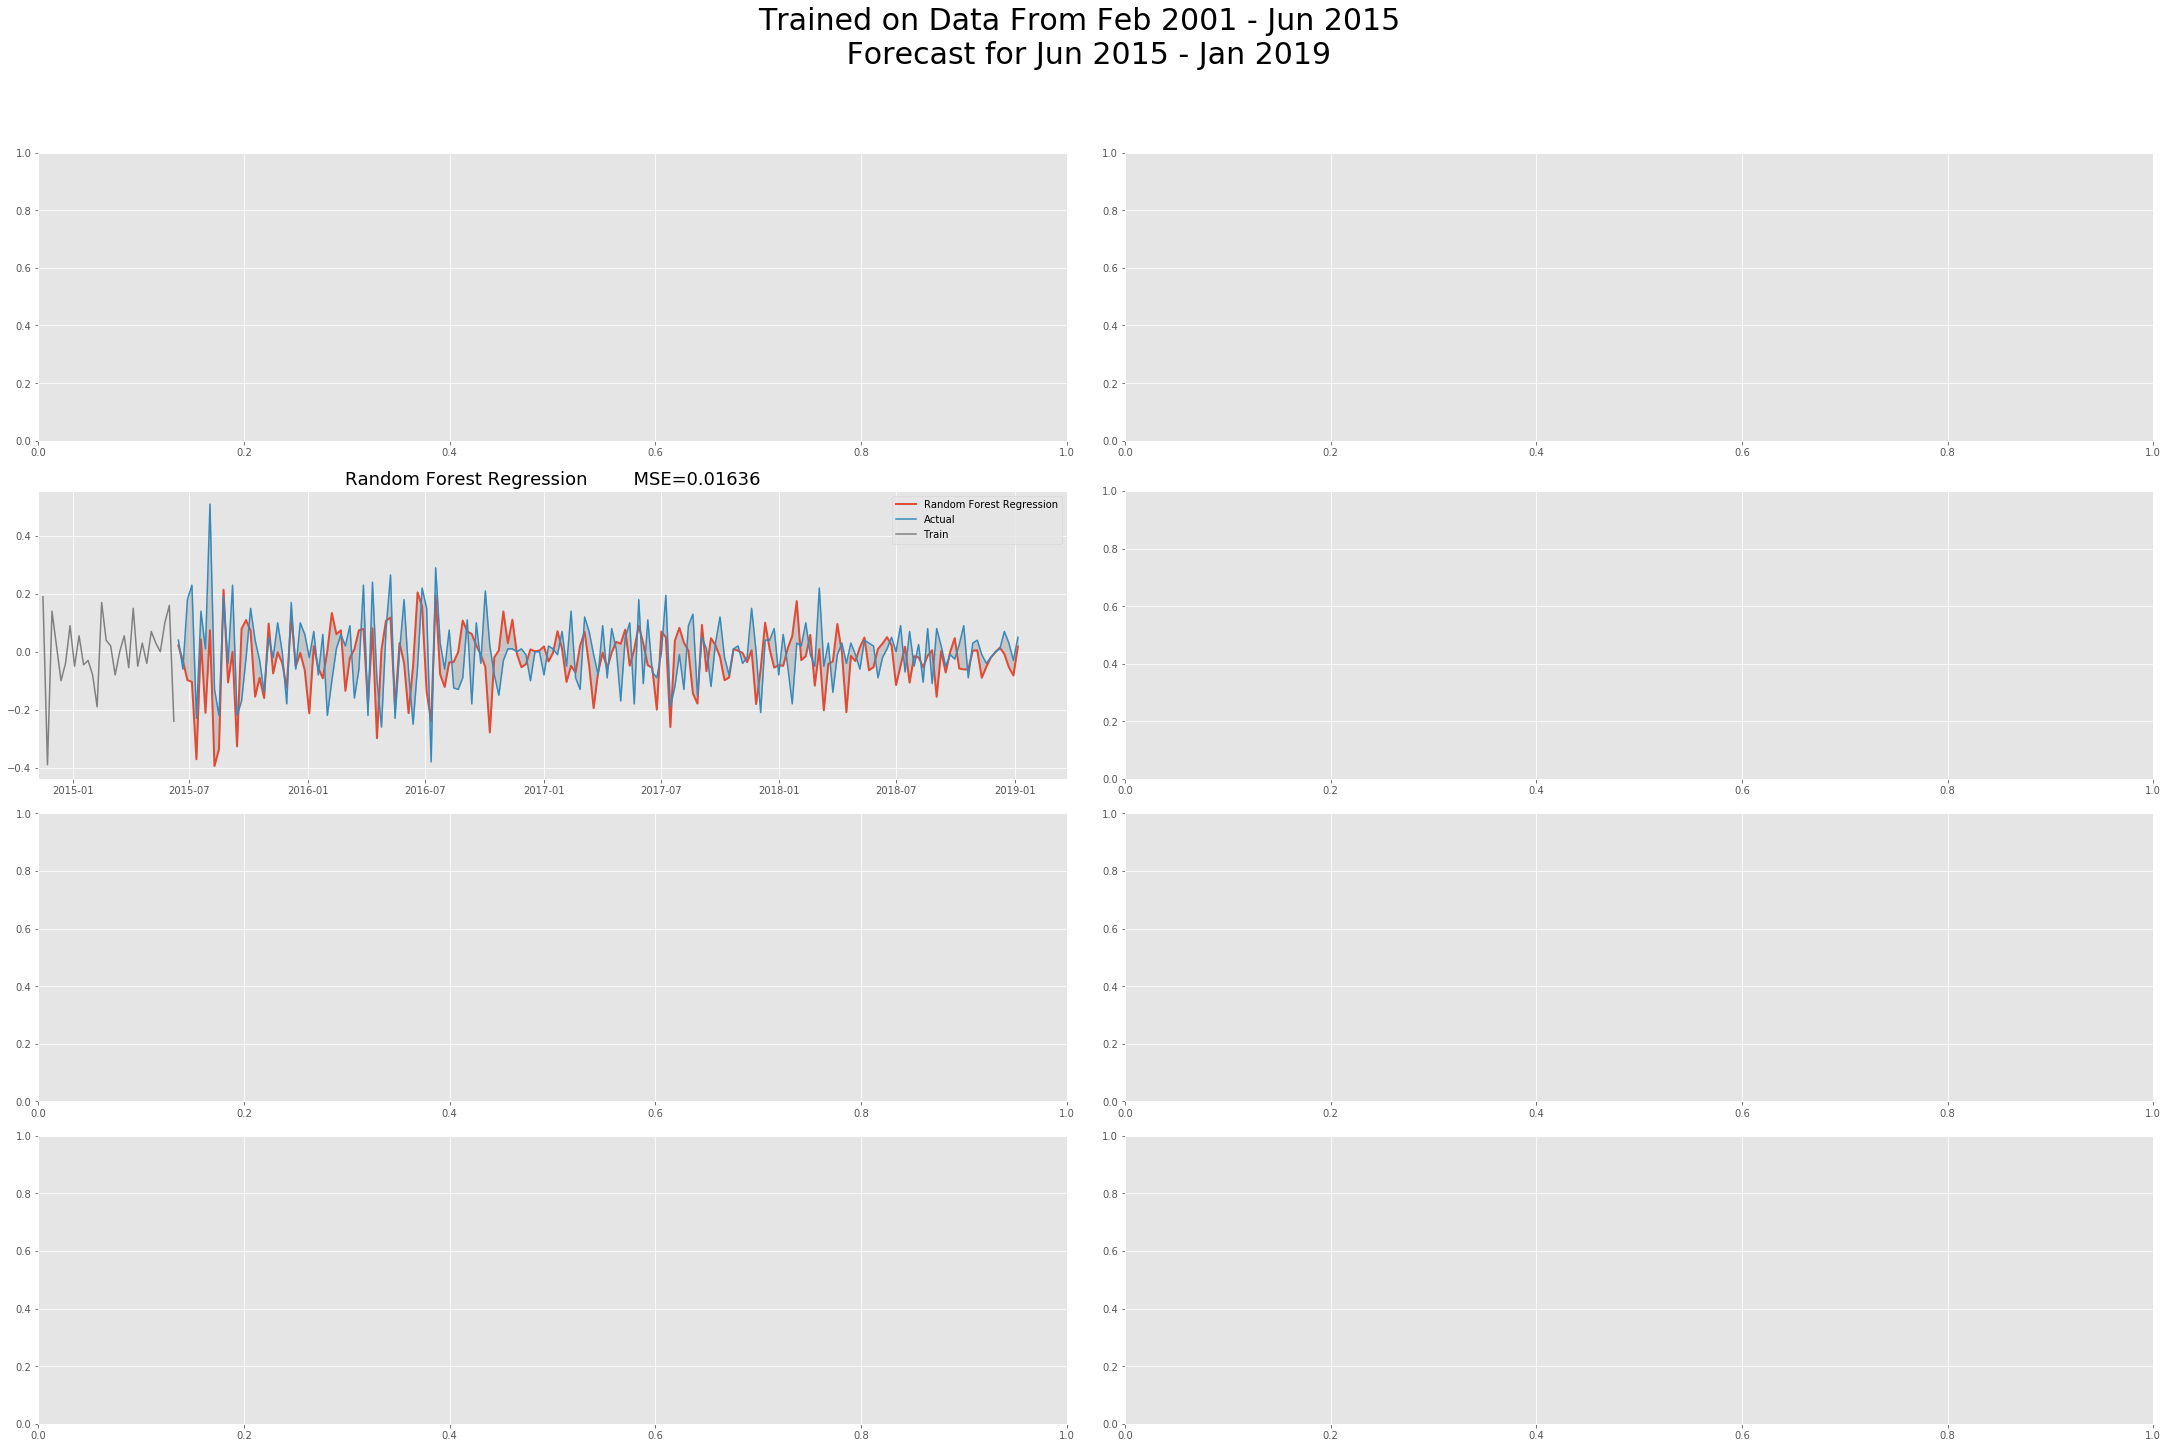

In [558]:
Models().show_model(df)

In [534]:
OLS_smf_resid,OLS_lin_resid,RandomForest_resid = Models().regressor_resids(df)


ValueError: not enough values to unpack (expected 4, got 2)

In [544]:
"{:.2f}".format(mu)

'0.00'

In [554]:
'$\mu=$ {:.2f}'

'$\\mu=$ {:.2f}'

In [564]:
res_list = [ARIMA_resid, Models().regressor_resids(df)[:]]

In [565]:
len(res_list)

2

In [604]:
%autoreload

In [584]:
fig = plt.figure(constrained_layout=True)
ax0 = fig.add_subplot(111)
ax0 = sns.distplot(y_test.cost_per_watt - rf.predict(X_test), fit=stats.norm, ax=ax0)

<Figure size 720x432 with 0 Axes>

SyntaxError: EOL while scanning string literal (<string>, line 1)

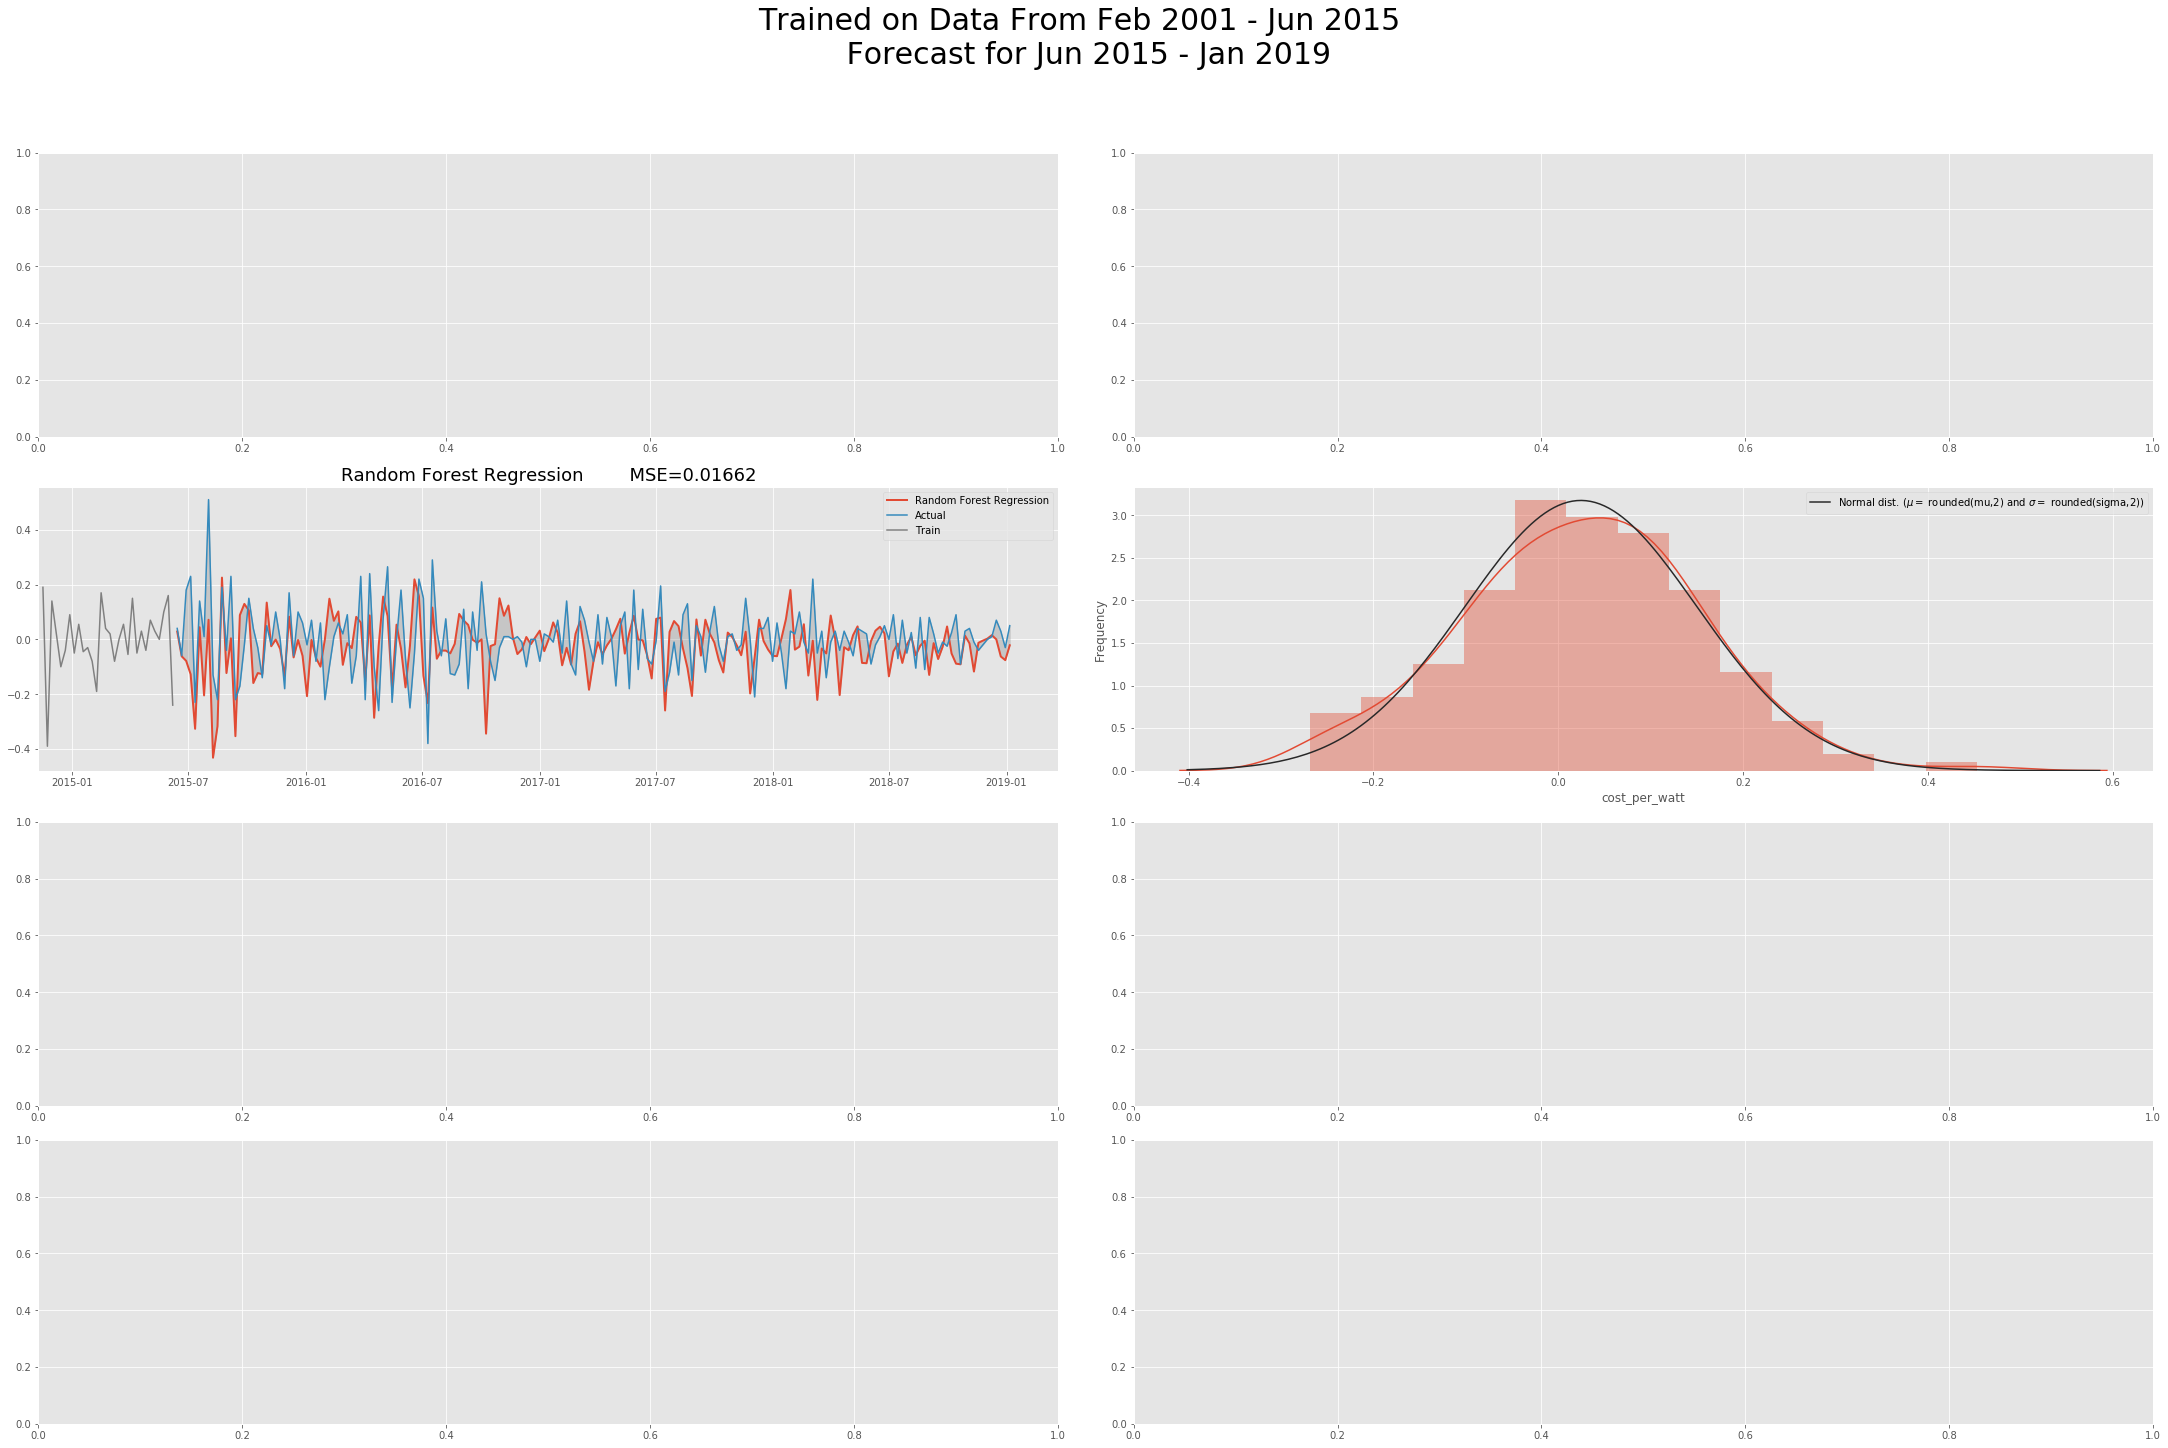

In [605]:
Models().show_model(df)

Text(0.5, 1.0, 'Residual Distribution for ARIMA \nNormal Test Result | statistic=419.9555 | pvalue=0.0')

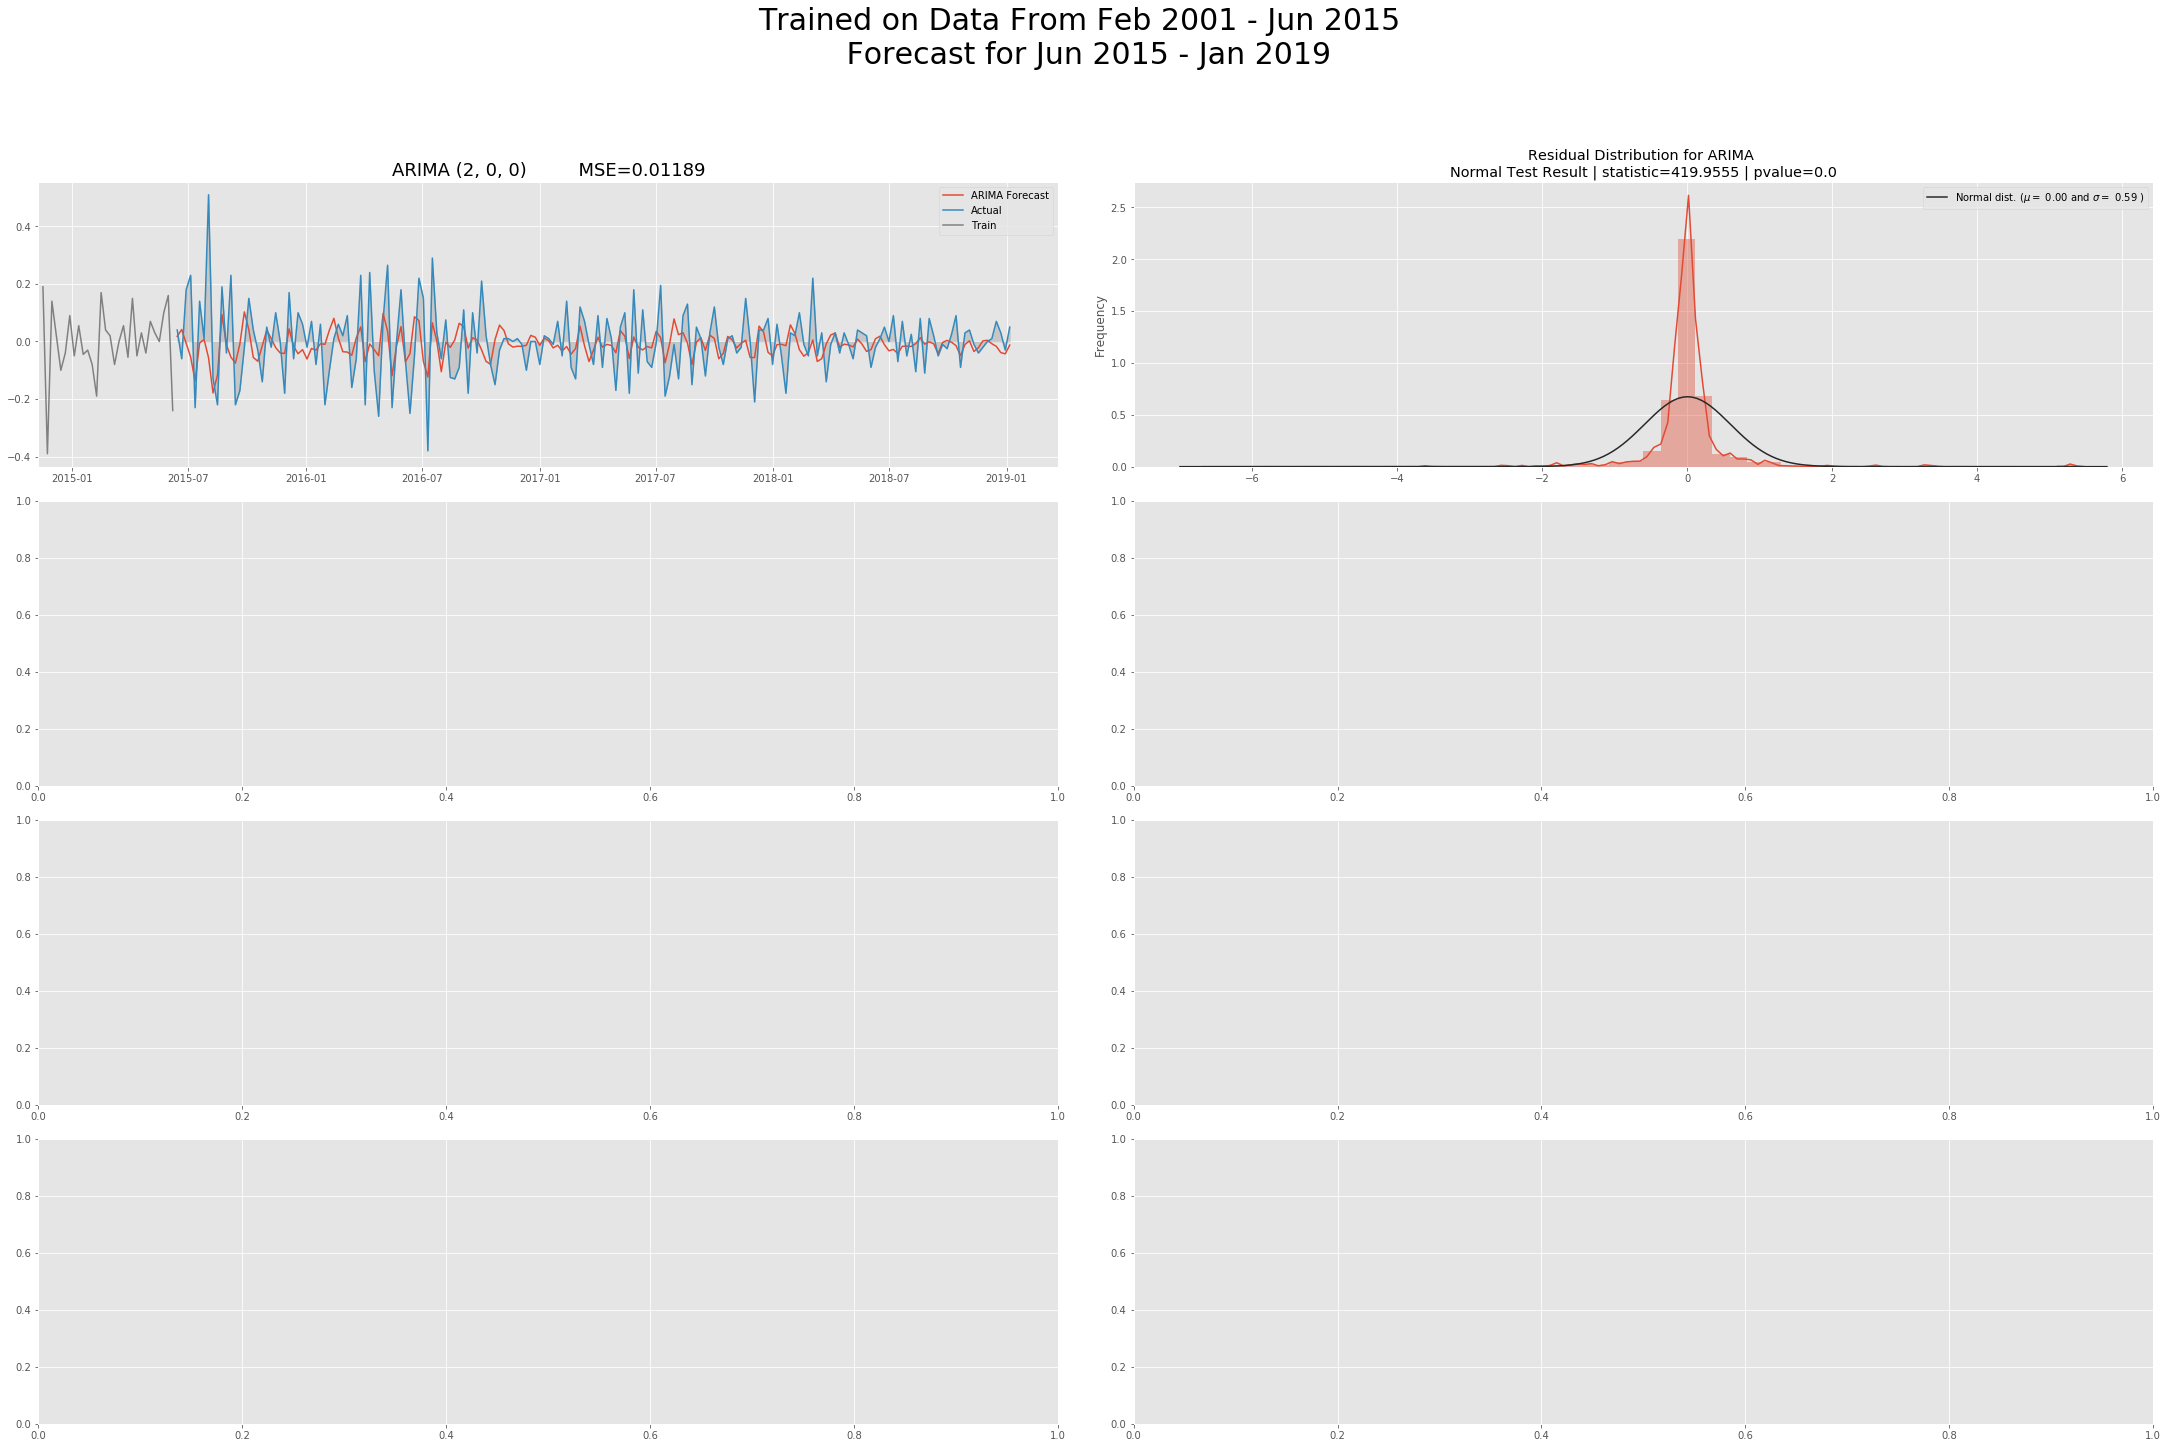

In [587]:
y_preds, y_train, [train_s, train_e, pred_s, pred_e], model_type = Models().regression(df)
res, atrain, atest, arima_title, a_pred, order = Models().ARIMA_predict(df)        
OLS_smf_resid,OLS_lin_resid,RandomForest_resid = Models().regressor_resids(df)
resid_list = [res.resid,OLS_smf_resid,OLS_lin_resid,RandomForest_resid]
idx = round(len(df)*.8)
fig, axs = plt.subplots(4,2, figsize= (30,20), constrained_layout=True)
fig.suptitle('Trained on Data From {} - {} \n Forecast for {} - {}\n \n'.format(
' '.join([train_s.strftime("%b"), str(train_s.year)]),
' '.join([train_e.strftime("%b"), str(train_e.year)]),
' '.join([pred_s.strftime("%b"), str(pred_s.year)]),
' '.join([pred_e.strftime("%b"), str(pred_e.year)])),fontsize=30)
for j in range(2):
    for i in range(1,4):
        exec(f"axs[{i},0].plot(y_preds.{Models().formastr(model_type[i])}, label= '{model_type[i]}', linewidth=2)")
        exec(f"axs[{i},0].plot(y_preds.actual, label= 'Actual')")
        exec(f"axs[{i},0].plot(y_train[-30:], label='Train', color='gray')")
        exec(f"axs[{i},0].fill_between(y_preds.index, y_preds.{Models().formastr(model_type[i])}, y_preds.actual, color='gray', alpha=.3)")
        exec(f"axs[{i},0].set_title('{model_type[i]}        MSE=%s' % round(mean_squared_error(y_preds.actual, y_preds.{Models().formastr(model_type[i])}),5), fontsize=18)")
        exec(f"axs[{i},0].legend(loc='best')")
        exec(f"axs[{i},0].set_xlim(left=y_train.index.date[-31])")
        exec(f"axs[{i},1] = sns.distplot({resid_list[i]}, fit=stats.norm, ax=axs[{i},1])")
        exec(f"(mu,sigma)= stats.norm.fit({resid_list[i]})")
        exec(f"axs[{i},1].legend(['Normal dist. ($\mu=$ rounded(mu,2) and $\sigma=$ rounded(sigma,2))'], loc='best')")
        exec(f"axs[{i},1].set_ylabel('Frequency')")
        exec(f"axs[{i},1].set_title('Residual Distribution for {self.formastr(model_type[i])} \nNormal Test Result | statistic={round(normaltest(resid_list[i])[0],4)} | pvalue={round(normaltest(resid_list[i])[1],5)}')")
axs[0,0].plot(a_pred, label='ARIMA Forecast')
axs[0,0].plot(atest.index, atest, label='Actual')
axs[0,0].plot(atrain.index[-30:], atrain[-30:], label='Train', color='gray')
axs[0,0].fill_between(a_pred.index, atest.cost_per_watt.values, 0, color='gray', alpha=.3)
axs[0,0].set_title(arima_title, fontsize=18)
axs[0,0].legend(loc='best')
axs[0,0].set_xlim(left=atrain.index.date[-31])
axs[0,1] = sns.distplot(resid_list[0], fit=stats.norm, ax=axs[0,1])
(mu,sigma)= stats.norm.fit(resid_list[0])
axs[0,1].legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
axs[0,1].set_ylabel('Frequency')
axs[0,1].set_title(f'Residual Distribution for ARIMA \nNormal Test Result | statistic={round(normaltest(resid_list[0])[0],4)} | pvalue={round(normaltest(resid_list[0])[1],5)}')


In [610]:
model_type[1][:-11]

'Random Forest'

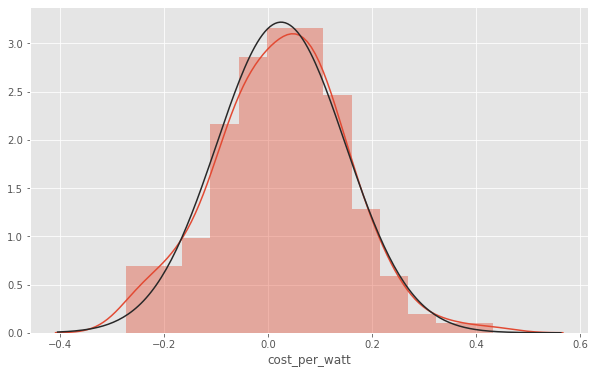

In [592]:
sns.distplot(RandomForest_resid, fit=stats.norm)
plt.title('')

In [591]:
RandomForest_resid

installation_date
2015-06-14   -0.047100
2015-06-21   -0.044000
2015-06-28    0.236100
2015-07-05    0.359650
2015-07-12    0.133100
                ...   
2018-12-09   -0.000300
2018-12-16    0.071315
2018-12-23    0.071900
2018-12-30    0.073150
2019-01-06    0.027000
Freq: W-SUN, Name: cost_per_watt, Length: 187, dtype: float64

In [572]:
OLS_smf_resid,OLS_lin_resid,RandomForest_resid = Models().regressor_resids(df)

In [573]:
OLS_smf_resid

0
installation_date          
2001-02-18        -1.358703
2001-02-25        -6.396476
2001-03-04        -2.311899
2001-03-11        -2.047402
2001-03-18        -0.896504
...                     ...
2015-05-10         0.095133
2015-05-17         0.075504
2015-05-24         0.167196
2015-05-31         0.257468
2015-06-07        -0.075993

[747 rows x 1 columns]

In [574]:
OLS_lin_resid

0
installation_date          
2001-02-18        -1.422201
2001-02-25        -6.432559
2001-03-04        -2.326866
2001-03-11        -2.071633
2001-03-18        -0.933658
...                     ...
2015-05-10         0.055718
2015-05-17         0.036043
2015-05-24         0.127747
2015-05-31         0.217877
2015-06-07        -0.115939

[747 rows x 1 columns]

In [643]:
%autoreload

SyntaxError: EOL while scanning string literal (<string>, line 1)

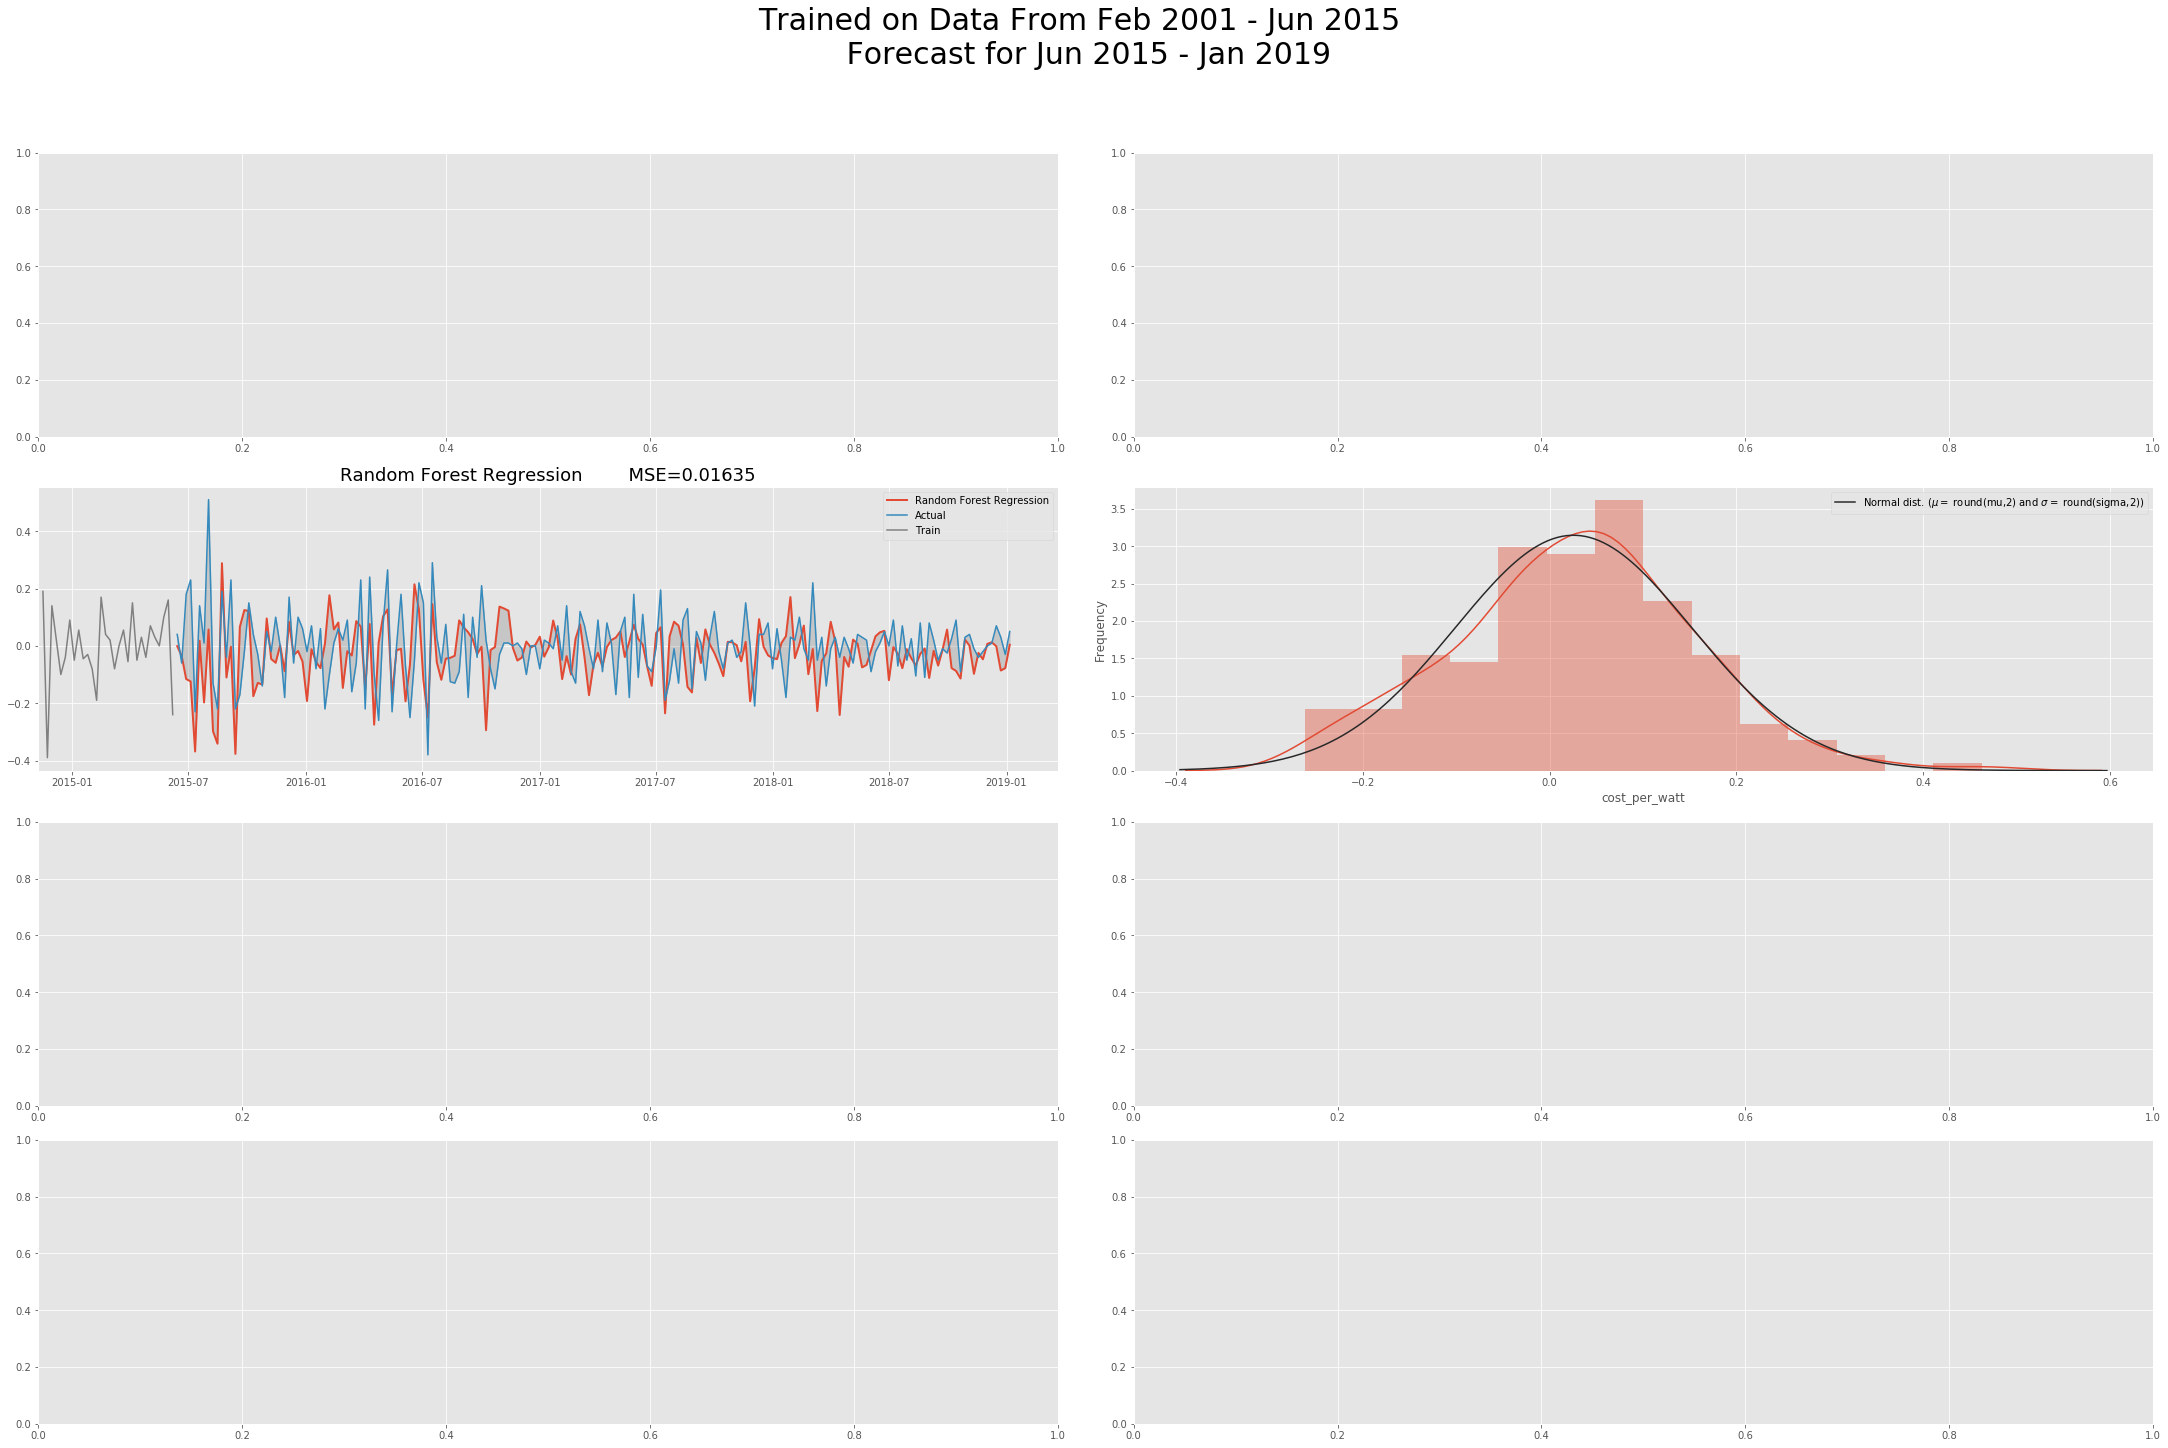

In [644]:
Models().show_model(df)

In [622]:
print("hey \n heyt")

hey 
 heyt


In [627]:
model_type[1][:-11]

'Random Forest'

In [637]:
for i in range(1,4):
    exec(f"axs[{i},1].set_title('Residual Distribution for {model_type[i][:-11]}\n Normal Test Result | statistic={round(normaltest(resid_list[i])[0],4)} | pvalue={round(normaltest(resid_list[i])[1],5)}')")

NameError: name 'rounded' is not defined

In [642]:
normaltest(resid_list[1])[0]

array([407.75308623])

In [641]:
resid_list[1]

[installation_date
 2001-01-28    5.278429
 2001-02-04    5.293746
 2001-02-11    5.339230
 2001-02-18   -3.594294
 2001-02-25   -6.547143
                 ...   
 2018-12-09    0.017842
 2018-12-16    0.086681
 2018-12-23    0.068614
 2018-12-30    0.012841
 2019-01-06    0.062426
 Freq: W-SUN, Length: 937, dtype: float64,
                           0
 installation_date          
 2001-02-18        -1.358703
 2001-02-25        -6.396476
 2001-03-04        -2.311899
 2001-03-11        -2.047402
 2001-03-18        -0.896504
 ...                     ...
 2015-05-10         0.095133
 2015-05-17         0.075504
 2015-05-24         0.167196
 2015-05-31         0.257468
 2015-06-07        -0.075993
 
 [747 rows x 1 columns],
                           0
 installation_date          
 2001-02-18        -1.422201
 2001-02-25        -6.432559
 2001-03-04        -2.326866
 2001-03-11        -2.071633
 2001-03-18        -0.933658
 ...                     ...
 2015-05-10         0.055718
 2015-05-

TypeError: type numpy.ndarray doesn't define __round__ method

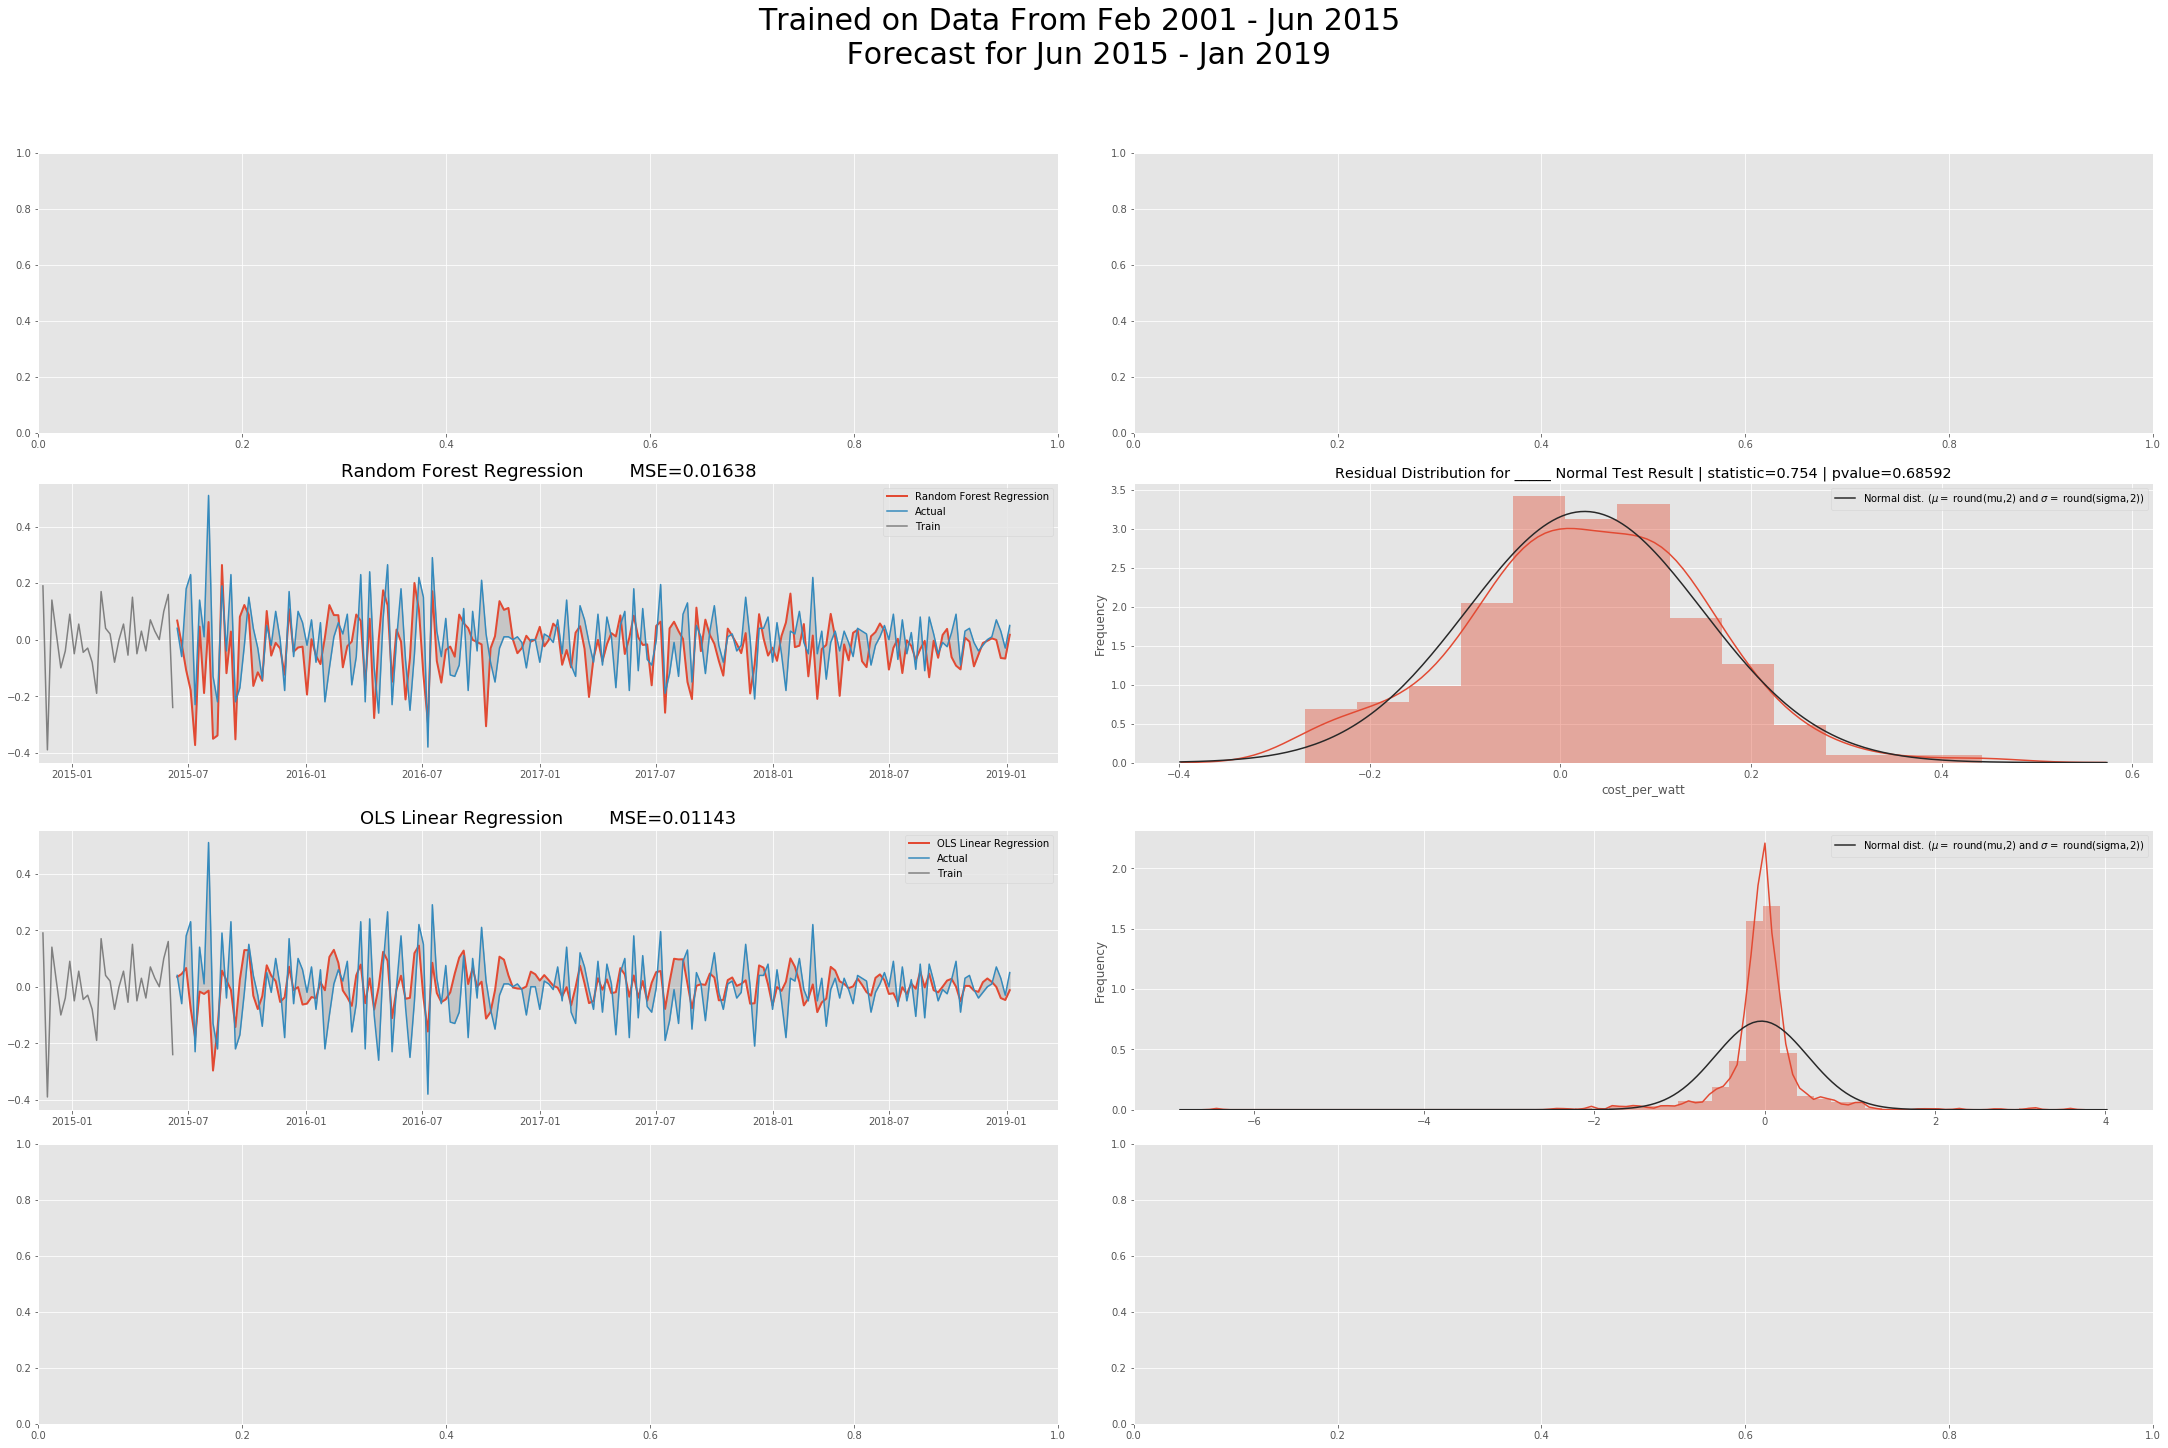

In [653]:
y_preds, y_train, [train_s, train_e, pred_s, pred_e], model_type = Models().regression(df)
res, atrain, atest, arima_title, a_pred, order = Models().ARIMA_predict(df)        
RandomForest_resid, OLS_lin_resid, OLS_smf_resid = Models().regressor_resids(df)
resid_list = [res.resid,RandomForest_resid, OLS_lin_resid, OLS_smf_resid]
idx = round(len(df)*.8)
fig, axs = plt.subplots(4,2, figsize= (30,20), constrained_layout=True)
fig.suptitle('Trained on Data From {} - {} \n Forecast for {} - {}\n \n'.format(
' '.join([train_s.strftime("%b"), str(train_s.year)]),
' '.join([train_e.strftime("%b"), str(train_e.year)]),
' '.join([pred_s.strftime("%b"), str(pred_s.year)]),
' '.join([pred_e.strftime("%b"), str(pred_e.year)])),fontsize=30)
for j in range(2):
    for i in range(1,4):
        exec(f"axs[{i},0].plot(y_preds.{Models().formastr(model_type[i])}, label= '{model_type[i]}', linewidth=2)")
        exec(f"axs[{i},0].plot(y_preds.actual, label= 'Actual')")
        exec(f"axs[{i},0].plot(y_train[-30:], label='Train', color='gray')")
        exec(f"axs[{i},0].fill_between(y_preds.index, y_preds.{Models().formastr(model_type[i])}, y_preds.actual, color='gray', alpha=.3)")
        exec(f"axs[{i},0].set_title('{model_type[i]}        MSE=%s' % round(mean_squared_error(y_preds.actual, y_preds.{Models().formastr(model_type[i])}),5), fontsize=18)")
        exec(f"axs[{i},0].legend(loc='best')")
        exec(f"axs[{i},0].set_xlim(left=y_train.index.date[-31])")
        exec(f"axs[{i},1] = sns.distplot(resid_list[{i}], fit=stats.norm, ax=axs[{i},1])")
        (mu,sigma)= stats.norm.fit(resid_list[i])
        exec(f"axs[{i},1].legend(['Normal dist. ($\mu=$ round(mu,2) and $\sigma=$ round(sigma,2))'], loc='best')")
        exec(f"axs[{i},1].set_ylabel('Frequency')")
        exec(f"axs[{i},1].set_title('Residual Distribution for _____ Normal Test Result | statistic={round(normaltest(resid_list[i])[0],4)} | pvalue={round(normaltest(resid_list[i])[1],5)}')")

        
        
axs[0,0].plot(a_pred, label='ARIMA Forecast')
axs[0,0].plot(atest.index, atest, label='Actual')
axs[0,0].plot(atrain.index[-30:], atrain[-30:], label='Train', color='gray')
axs[0,0].fill_between(a_pred.index, atest.cost_per_watt.values, 0, color='gray', alpha=.3)
axs[0,0].set_title(arima_title, fontsize=18)
axs[0,0].legend(loc='best')
axs[0,0].set_xlim(left=atrain.index.date[-31])
axs[0,1] = sns.distplot(resid_list[0], fit=stats.norm, ax=axs[0,1])
(mu,sigma)= stats.norm.fit(resid_list[0])
axs[0,1].legend(['Normal dist. ($\mu=$ rounded(mu,2) and $\sigma=$ rounded(sigma,2))'], loc='best')
axs[0,1].set_ylabel('Frequency')
axs[0,1].set_title(f'Residual Distribution for ARIMA \nNormal Test Result | statistic={round(normaltest(resid_list[0])[0],4)} | pvalue={round(normaltest(resid_list[0])[1],5)}')
#plt.savefig('model_plots.png')
plt.show()


In [649]:
OLS_lin_resid

0
installation_date          
2001-02-18        -1.422201
2001-02-25        -6.432559
2001-03-04        -2.326866
2001-03-11        -2.071633
2001-03-18        -0.933658
...                     ...
2015-05-10         0.055718
2015-05-17         0.036043
2015-05-24         0.127747
2015-05-31         0.217877
2015-06-07        -0.115939

[747 rows x 1 columns]